In [1]:
import json 

def get_exp_results(exp_name): 
    """
    Loads json with experimental results
    """
    path = f"experiments/results/{exp_name}.json"
    with open(path, 'r') as openfile:
                results = json.load(openfile)
    return results

In [2]:
import pandas as pd
def print_exp_info(exp_name, show_results=True):
    info = get_exp_results(exp_name)
    for k, v in info.items():
        if isinstance(v, str):
            print(f"{k}:::{v[:100]}")
        elif isinstance(v, list):
            if show_results:
                for i, elem in enumerate(v):
                    print(f"{k}#{i}:::{elem[:50]}")
        else:
            print(f"{k}:::{v}")
                  

In [3]:
import matplotlib.pyplot as plt

def visualize_2d_results(exp_name, labels=["accuracy", "fairness"], inv=True,
                        ignore_first=True, baseline_pts = None, baseline_lbls = None):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]
    if inv:
        result = result[::-1]
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(result[0], result[1], label = "Pareto Curve", color = 'purple')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    if baseline_pts: 
        for i in range(len(baseline_pts)):
            plt.scatter(baseline_pts[i][0], baseline_pts[i][1], label = baseline_lbls[i])
    plt.legend()
    plt.show()
    

In [4]:
import matplotlib.tri as tri

ORDERS = [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

def visualize_3d_results(exp_name, 
                         labels=["accuracy", "robustness", "fairness"],
                         ignore_first=True, mode='3D'):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]

    fig = plt.figure(figsize = (12, 8))
    for i in range(len(ORDERS)):
        order = ORDERS[i]
        x = result[order[0]]
        y = result[order[1]]
        z = result[order[2]]
        if mode == "3D":
            ax1 = fig.add_subplot(2, 3, 1 + i, projection='3d', label = "Pareto Plane")
            ax1.scatter(x, y, z)
            ax1.set_zlabel(labels[order[2]])
        else:
            ax1 = fig.add_subplot(2, 3, 1 + i, label = "Countur Levels")
            ax1.tricontourf(x, y, z)
            ax1.set_title(f"Countur plot for {labels[order[2]]}")
            triang = tri.Triangulation(x, y)
            tcf = ax1.tricontourf(triang, z)
            fig.colorbar(tcf)
        ax1.set_xlabel(labels[order[0]])
        ax1.set_ylabel(labels[order[1]])
        
    plt.show()

In [5]:
def visualize_3d_results_projections(exp_name, 
                         labels=["accuracy", "robustness", "fairness"]):
    info = get_exp_results(exp_name)
    result = info["result"]
    fig = plt.figure(figsize = (10, 10))
    cnt = 0
    for i in range(3):
        for j in range(i + 1, 3):
            #order = ORDERS[i]
            x = result[i]
            y = result[j]
            ax1 = fig.add_subplot(2, 2, 1 + cnt, label = "Pareto Plane")
            cnt += 1
            ax1.scatter(x, y, alpha=0.2, color='aqua')
            ax1.set_xlabel(labels[i])
            ax1.set_ylabel(labels[j])
    plt.show()

def compare_3d_results_projections(exp1_name, exp2_name, legend_labels = ["hypernetworks", "manual"],
                     labels=["accuracy", "robustness", "fairness"]):
    info1 = get_exp_results(exp1_name)
    result1 = info1["result"]
    info2 = get_exp_results(exp2_name)
    result2 = info2["result"]
    fig = plt.figure(figsize = (15, 5))
    cnt = 0
    for i in range(3):
        for j in range(i + 1, 3):
            x1 = result1[i]
            y1 = result1[j]
            x2 = result2[i]
            y2 = result2[j]
            ax1 = fig.add_subplot(1, 3, 1 + cnt, label = "Pareto curve")
            cnt += 1
            ax1.scatter(x1, y1, alpha=0.2, color='aqua', label = legend_labels[0])
            ax1.scatter(x2, y2, alpha=0.8, color='lightcoral', label = legend_labels[1])
            ax1.set_xlabel(labels[i])
            ax1.set_ylabel(labels[j])
            plt.legend()
    plt.show()

In [9]:
def compare_experiments_2d(fst_exp_name, snd_exp_name, legend_labels = ["hypernetworks", "LS"],
                        labels=["logloss", "fairness loss"], inv=False,
                        ignore_first=False, baseline_pts = None, baseline_lbls = None):
    results = []
    for exp_name in (fst_exp_name, snd_exp_name):
        info = get_exp_results(exp_name)
        result = info["result"]
        if ignore_first:
            for i in range(len(result)):
                result[i] = result[i][1:]
        if inv:
            result = result[::-1]
        results.append(result)
    if inv:
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(results[0][0], results[0][1], label = legend_labels[0], color = 'purple')
    plt.plot(results[1][0], results[1][1], label = legend_labels[1], color = 'orange')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    if baseline_pts: 
        for i in range(len(baseline_pts)):
            plt.scatter(baseline_pts[i][0], baseline_pts[i][1], label = baseline_lbls[i])
    plt.legend()
    plt.show()

In [7]:
import numpy as np
def visualize_results_projections(exp_name, dim=4,
                         labels=["accuracy", "robustness", "fairness"]):
    info = get_exp_results(exp_name)
    result = info["result"]
    max_cnt = dim * (dim - 1) / 2
    fig = plt.figure(figsize = (15, 10))
    cnt = 0
    for i in range(dim):
        for j in range(i + 1, dim):
            x = result[i]
            y = result[j]
            ax1 = fig.add_subplot(2, int(np.ceil(max_cnt / 2)),  1 + cnt, label = "Pareto Plane")
            cnt += 1
            ax1.scatter(x, y, alpha=0.2, color='aqua')
            ax1.set_xlabel(labels[i])
            ax1.set_ylabel(labels[j])
    plt.show()



# Baseline

In [8]:
LOSSES = ["logloss", "group fair", "ind fair", "robust adv loss", "robust l2 loss"]

#y_pred == 1 always
const_1_losses = [1.7653, 0, 0.1782, 1,7653, 0]
const_0_losses = [0.6425, 0, 0.0022, 0.6452, 0]
random_losses = [0.9955, 0, 0.1857, None, None]

baseline_losses = [const_0_losses, const_1_losses, random_losses]
baseline_lables = ["y_pred = 0", "y_pred = 1", "random"]

# Hypernetwork training (group fair vs logloss) for FIXED RAY

In [14]:
train_losses = [0.3611994981765747, 0.34290945529937744, 0.3294493556022644, 0.3199297785758972, 0.31270119547843933, 0.3072323501110077, 0.3033446967601776, 0.30073919892311096, 0.299119234085083, 0.2981640100479126, 0.2976784408092499, 0.29747912287712097, 0.2974177300930023, 0.29740819334983826, 0.2974097728729248, 0.2974082827568054, 0.2974035441875458, 0.29739800095558167, 0.29739221930503845, 0.29738739132881165, 0.2973850965499878, 0.29738593101501465, 0.29738742113113403, 0.29738500714302063, 0.2973942756652832, 0.297384649515152, 0.2973882853984833, 0.2973857820034027, 0.29738855361938477, 0.2973920404911041, 0.29738643765449524, 0.2973845601081848, 0.2973843514919281, 0.2973846197128296, 0.2973858714103699, 0.29738399386405945, 0.2973840832710266, 0.2973844110965729, 0.29738497734069824, 0.29738524556159973, 0.29738691449165344, 0.2973879873752594, 0.297384113073349, 0.29738593101501465, 0.29738637804985046, 0.29738399386405945, 0.2973847985267639, 0.29738521575927734, 0.29738378524780273, 0.29738467931747437, 0.29738298058509827, 0.297386109828949, 0.2973860502243042, 0.2973884642124176, 0.2973872423171997, 0.29738470911979675, 0.29738447070121765, 0.2973848283290863, 0.29738613963127136, 0.29738759994506836, 0.29738542437553406, 0.29738715291023254, 0.2973887026309967, 0.29738661646842957, 0.2973862588405609, 0.29738757014274597, 0.2973876893520355, 0.2973901033401489, 0.2973874807357788, 0.2973918914794922, 0.29739102721214294, 0.2973853349685669, 0.29738590121269226, 0.2973853647708893, 0.2973843812942505, 0.2973840832710266, 0.2973850965499878, 0.29738616943359375, 0.2973858416080475, 0.2973894476890564, 0.29738786816596985, 0.29738959670066833, 0.2973906993865967, 0.2973867952823639, 0.2973862886428833, 0.2973857522010803, 0.29738470911979675, 0.2973880171775818, 0.29738670587539673, 0.2973870635032654, 0.297387957572937, 0.29738807678222656, 0.2973853349685669, 0.2973851263523102, 0.29738712310791016, 0.2973839044570923, 0.29738396406173706, 0.2973840832710266, 0.29739001393318176, 0.29738572239875793, 0.2973916530609131, 0.29738691449165344, 0.2973860502243042, 0.2973865568637848, 0.2973884642124176, 0.29738715291023254, 0.29738518595695496, 0.29738420248031616, 0.29738739132881165, 0.2973867952823639, 0.29738548398017883, 0.2973922789096832, 0.2973904311656952, 0.2973884642124176, 0.29739806056022644, 0.29738882184028625, 0.29738619923591614, 0.2973901331424713, 0.29738548398017883, 0.29738742113113403, 0.2973898947238922, 0.2973876893520355, 0.29738759994506836, 0.2973836362361908, 0.2973875403404236, 0.29738864302635193, 0.2973857820034027, 0.29738542437553406, 0.29738649725914, 0.2973892092704773, 0.29738909006118774, 0.2973834276199341, 0.29739412665367126, 0.2973847985267639, 0.29738661646842957, 0.29738813638687134, 0.29738932847976685, 0.29738572239875793, 0.2973853051662445, 0.2973863482475281, 0.29738545417785645, 0.297387033700943, 0.29738545417785645, 0.29738643765449524, 0.297387033700943, 0.29738736152648926, 0.2973877191543579, 0.2973865568637848, 0.2973864674568176, 0.2973884046077728, 0.297387957572937, 0.29738593101501465, 0.2973918318748474, 0.29738879203796387, 0.29738712310791016, 0.2973916828632355, 0.29739052057266235, 0.29738789796829224, 0.29739266633987427, 0.29738739132881165, 0.2973870635032654, 0.2973901033401489, 0.2973889112472534, 0.2973891496658325, 0.29738572239875793, 0.29739058017730713, 0.2973836362361908, 0.2973867952823639, 0.29738521575927734, 0.2973865568637848, 0.29738694429397583, 0.29738491773605347, 0.297386109828949, 0.29739177227020264, 0.2973843812942505, 0.2973911166191101, 0.2973889708518982, 0.2973892390727997, 0.2973901033401489, 0.29739081859588623, 0.2973889410495758, 0.297384113073349, 0.2973920404911041, 0.2973864674568176, 0.2973935306072235, 0.2973863184452057, 0.2973887026309967, 0.29738450050354004, 0.2973879873752594, 0.29738670587539673, 0.29738861322402954, 0.29738849401474, 0.29738619923591614, 0.29738903045654297, 0.29738670587539673, 0.29739007353782654, 0.2973877191543579, 0.29738882184028625, 0.2973872721195221, 0.29738757014274597, 0.29738950729370117, 0.2973862290382385, 0.2973838150501251, 0.29738640785217285, 0.29738467931747437, 0.2973897159099579, 0.29738596081733704, 0.29738953709602356, 0.2973868250846863, 0.29739195108413696, 0.2973937392234802, 0.2973938286304474, 0.29738715291023254, 0.297390341758728, 0.2973875403404236, 0.29738694429397583, 0.297385036945343, 0.29738765954971313, 0.29738596081733704, 0.29738497734069824, 0.2973874807357788, 0.2973873019218445, 0.29738664627075195, 0.2973875403404236, 0.2973919212818146, 0.29738926887512207, 0.2973921597003937, 0.297389417886734, 0.29738643765449524, 0.2973896265029907, 0.2973901033401489, 0.2973865270614624, 0.2973911762237549, 0.2973884046077728, 0.29739299416542053, 0.29738694429397583, 0.29738667607307434, 0.2973860502243042, 0.29739072918891907, 0.29738926887512207, 0.29739370942115784, 0.2973858714103699, 0.29738953709602356, 0.29738569259643555, 0.29738643765449524, 0.297386109828949, 0.29738473892211914, 0.29738715291023254, 0.2973863482475281, 0.29738420248031616]

val_losses = [0.36092641949653625, 0.34234291315078735, 0.3286011517047882, 0.31893062591552734, 0.3116794526576996, 0.3062812387943268, 0.3024340569972992, 0.2998717427253723, 0.29832106828689575, 0.297420471906662, 0.2969552278518677, 0.29677775502204895, 0.29672756791114807, 0.2967309057712555, 0.29671546816825867, 0.29669544100761414, 0.2966810166835785, 0.29668131470680237, 0.29665836691856384, 0.2966625988483429, 0.2966672480106354, 0.2966651916503906, 0.29668349027633667, 0.29668882489204407, 0.2966901957988739, 0.29666298627853394, 0.29664525389671326, 0.2966539263725281, 0.29667025804519653, 0.29666438698768616, 0.29666411876678467, 0.2966853976249695, 0.296684592962265, 0.29666784405708313, 0.29666948318481445, 0.29666373133659363, 0.2966715693473816, 0.296680748462677, 0.29664814472198486, 0.296658456325531, 0.29668474197387695, 0.2967023253440857, 0.296677827835083, 0.29665809869766235, 0.29665619134902954, 0.2966458797454834, 0.29666033387184143, 0.2966609597206116, 0.29666900634765625, 0.296663761138916, 0.29665353894233704, 0.2966417968273163, 0.2966768741607666, 0.2966911792755127, 0.2966952621936798, 0.2966880798339844, 0.2966623306274414, 0.29665014147758484, 0.29666733741760254, 0.29666563868522644, 0.29666659235954285, 0.29668137431144714, 0.2966994047164917, 0.2966672480106354, 0.29665106534957886, 0.2966628968715668, 0.2966631352901459, 0.296634703874588, 0.29664725065231323, 0.29668745398521423, 0.2966856360435486, 0.2966615855693817, 0.2966415286064148, 0.29666411876678467, 0.2966727912425995, 0.29666122794151306, 0.2966586649417877, 0.2966594099998474, 0.29665693640708923, 0.2966407537460327, 0.2966640293598175, 0.2967160940170288, 0.2966834604740143, 0.2966490089893341, 0.29664379358291626, 0.2966560125350952, 0.29666855931282043, 0.2966736853122711, 0.29667794704437256, 0.2966746687889099, 0.2966732382774353, 0.2967122793197632, 0.29668664932250977, 0.2966751754283905, 0.2966480851173401, 0.2966519892215729, 0.2966494858264923, 0.2966468632221222, 0.2966824471950531, 0.29668885469436646, 0.296686589717865, 0.29666510224342346, 0.29663676023483276, 0.29664140939712524, 0.2966349124908447, 0.29665637016296387, 0.29666027426719666, 0.29667675495147705, 0.2967097759246826, 0.2967025935649872, 0.2966601550579071, 0.29662320017814636, 0.29664456844329834, 0.29667773842811584, 0.29671818017959595, 0.29666706919670105, 0.296657919883728, 0.2966712713241577, 0.2966563105583191, 0.2966489791870117, 0.29665181040763855, 0.2966688573360443, 0.296660840511322, 0.2966627776622772, 0.2966572344303131, 0.2966752052307129, 0.2966875731945038, 0.29668092727661133, 0.2966645061969757, 0.2966840863227844, 0.29667824506759644, 0.2966684103012085, 0.29665815830230713, 0.29667073488235474, 0.2966826558113098, 0.29666081070899963, 0.2966681718826294, 0.29664766788482666, 0.2966662049293518, 0.2966587245464325, 0.296644389629364, 0.29664546251296997, 0.29666101932525635, 0.29668930172920227, 0.296690970659256, 0.2966800928115845, 0.29666709899902344, 0.29664260149002075, 0.2966408133506775, 0.2967061698436737, 0.2966916263103485, 0.29667019844055176, 0.2966737151145935, 0.29669463634490967, 0.2966838479042053, 0.29666224122047424, 0.296649694442749, 0.2966926097869873, 0.29671189188957214, 0.29666703939437866, 0.2966402769088745, 0.2966373562812805, 0.29666972160339355, 0.2966853082180023, 0.2966787815093994, 0.2966766059398651, 0.2966628670692444, 0.2966736853122711, 0.296651691198349, 0.2966483533382416, 0.2966707944869995, 0.2966923415660858, 0.29665660858154297, 0.2966742217540741, 0.2966582775115967, 0.2966538071632385, 0.2966616153717041, 0.29665407538414, 0.2966558337211609, 0.2966632843017578, 0.29666680097579956, 0.2966698110103607, 0.2966585159301758, 0.2966632544994354, 0.296722948551178, 0.29666590690612793, 0.2966758906841278, 0.2966679632663727, 0.29664963483810425, 0.29664063453674316, 0.2966831624507904, 0.29669979214668274, 0.2966659367084503, 0.2966318428516388, 0.29666200280189514, 0.296665757894516, 0.29664862155914307, 0.2966296076774597, 0.29667073488235474, 0.29670706391334534, 0.29668334126472473, 0.29665523767471313, 0.2966596484184265, 0.29665738344192505, 0.29667332768440247, 0.29670554399490356, 0.29668474197387695, 0.2966703474521637, 0.2966681718826294, 0.2966850697994232, 0.29664215445518494, 0.2966766953468323, 0.2966785132884979, 0.29667195677757263, 0.2966545820236206, 0.2966698110103607, 0.29667896032333374, 0.29664644598960876, 0.296679824590683, 0.2966751456260681, 0.2966488301753998, 0.2966457009315491, 0.2966576814651489, 0.2966625988483429, 0.2966881990432739, 0.2966610789299011, 0.2966456711292267, 0.29666635394096375, 0.2967022955417633, 0.2966574728488922, 0.29665014147758484, 0.2966667711734772, 0.29670846462249756, 0.29669126868247986, 0.29665619134902954, 0.2966437339782715, 0.29667335748672485, 0.2966828942298889, 0.29668790102005005, 0.29668617248535156, 0.29667240381240845, 0.2966473400592804, 0.29663926362991333, 0.29666513204574585, 0.29667145013809204, 0.2966713607311249, 0.2966587245464325, 0.29667726159095764, 0.29667404294013977, 0.29667359590530396]


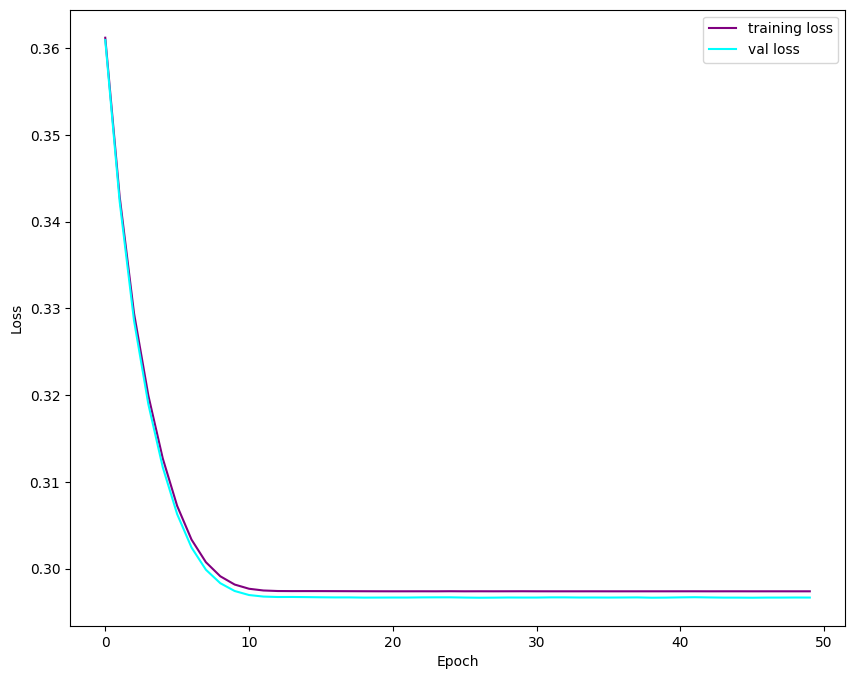

In [15]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses[:50], color='purple', label = "training loss")
plt.plot(val_losses[:50], color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Results: 

* Converges in 10 epochs
* Val loss < train loss (?!!!)

## Hypernet loss for exp40 (fixed ray)

In [13]:
train_losses = [0.31979936361312866, 0.3052186071872711, 0.30389878153800964, 0.30174845457077026, 0.3038250803947449, 0.3061393201351166, 0.30508822202682495, 0.3028406798839569, 0.30215373635292053, 0.3027191162109375, 0.30201032757759094, 0.3014475405216217, 0.3016327917575836, 0.30199137330055237, 0.3024712800979614, 0.3025631606578827, 0.30131834745407104, 0.30097803473472595, 0.30112406611442566, 0.30126234889030457, 0.3011145293712616, 0.3011210262775421, 0.3013996481895447, 0.30161210894584656, 0.30136963725090027, 0.30097493529319763, 0.3009703457355499, 0.30128422379493713, 0.3014703094959259, 0.3012571334838867, 0.30099937319755554, 0.301066130399704, 0.3010077476501465, 0.30097126960754395, 0.30113404989242554, 0.3009408116340637, 0.3009127378463745, 0.3009513020515442, 0.30103886127471924, 0.30098989605903625, 0.3010250926017761, 0.3010266423225403, 0.3010176420211792, 0.3010048270225525, 0.3010566234588623, 0.3009566068649292, 0.30099916458129883, 0.301074355840683, 0.30108508467674255, 0.30089542269706726, 0.3010002076625824, 0.30100977420806885, 0.3009242117404938, 0.3008832335472107, 0.30092352628707886, 0.3009719252586365, 0.30086469650268555, 0.3009040951728821, 0.30090147256851196, 0.30089065432548523, 0.3009055256843567, 0.30093419551849365, 0.30090266466140747, 0.30096951127052307, 0.3008904457092285, 0.3009408414363861, 0.3009706735610962, 0.3009292781352997, 0.30096545815467834, 0.3009067177772522, 0.30100157856941223, 0.3008940815925598, 0.30093660950660706, 0.300925612449646, 0.30105483531951904, 0.3008846342563629, 0.30114537477493286, 0.30096083879470825, 0.3010443150997162, 0.3009014427661896, 0.3009742498397827, 0.3009011745452881, 0.3009670376777649, 0.3009997308254242, 0.3010040521621704, 0.30099472403526306, 0.3009164333343506, 0.3010113537311554, 0.3009102940559387, 0.300936222076416, 0.30091342329978943, 0.30089569091796875, 0.3008650243282318, 0.30098530650138855, 0.3009469509124756, 0.30094048380851746, 0.30105265974998474, 0.30096933245658875, 0.3009547293186188, 0.30093440413475037, 0.30096742510795593, 0.30093294382095337, 0.3008923828601837, 0.3008909821510315, 0.3010351359844208, 0.30100277066230774, 0.3009285628795624, 0.30100154876708984, 0.30092766880989075, 0.30112603306770325, 0.3009258806705475, 0.30105000734329224, 0.30094048380851746, 0.3010270595550537, 0.3009193241596222, 0.3009451925754547, 0.3010086715221405, 0.3009113073348999, 0.30088168382644653, 0.3009372353553772, 0.30095943808555603, 0.3012561798095703, 0.30099305510520935, 0.3008915185928345, 0.30118346214294434, 0.3010132610797882, 0.3009345531463623, 0.30098286271095276, 0.3010037839412689, 0.30097684264183044, 0.3008635938167572, 0.300957053899765, 0.30098822712898254, 0.3009144961833954, 0.3009718060493469, 0.3009204566478729, 0.30113181471824646, 0.30096936225891113, 0.30096206068992615, 0.3010985851287842, 0.30106136202812195, 0.3009359538555145, 0.30111223459243774, 0.3008905053138733, 0.3010372519493103, 0.3009715676307678, 0.3009140193462372, 0.30101481080055237, 0.3009127080440521, 0.3009067177772522, 0.3009708523750305, 0.3009827136993408, 0.30086958408355713, 0.30098775029182434, 0.3009573817253113, 0.30096435546875, 0.3010006248950958, 0.3009251356124878, 0.30093780159950256, 0.30088797211647034, 0.3009330928325653, 0.30090054869651794, 0.30094173550605774, 0.3009524941444397, 0.30086469650268555, 0.3008790910243988, 0.3009200692176819, 0.3009718954563141, 0.3010139465332031, 0.30090832710266113, 0.30087992548942566, 0.3009227514266968, 0.3009609580039978, 0.30094724893569946, 0.3010362982749939, 0.30097249150276184, 0.30093103647232056, 0.30095648765563965, 0.300914466381073, 0.30100178718566895, 0.30089306831359863, 0.3010270893573761, 0.30098462104797363, 0.3010351359844208, 0.30091798305511475, 0.30102768540382385, 0.3010209798812866, 0.3009028434753418, 0.30087193846702576, 0.30100977420806885, 0.30092117190361023, 0.3011397123336792, 0.300940603017807, 0.30095046758651733, 0.30095282196998596, 0.30091536045074463, 0.30092769861221313, 0.30090126395225525, 0.30104607343673706, 0.3008939027786255, 0.30113276839256287, 0.3009794056415558, 0.30099591612815857, 0.3009505867958069, 0.3009381890296936, 0.30099570751190186, 0.30097606778144836, 0.30092257261276245, 0.30117514729499817, 0.30090761184692383, 0.3009507656097412, 0.30090686678886414, 0.3009037375450134, 0.3010196387767792, 0.3008832335472107, 0.30090776085853577, 0.30089277029037476, 0.3009727895259857, 0.3009094297885895, 0.30087533593177795, 0.3009444773197174, 0.30089327692985535, 0.3009139895439148, 0.3010846674442291, 0.30089160799980164, 0.30123183131217957, 0.3008922338485718, 0.30093759298324585, 0.30087369680404663, 0.3009462356567383, 0.30093517899513245, 0.3009549379348755, 0.30101487040519714, 0.3009898364543915, 0.30093082785606384, 0.3008711338043213, 0.30090293288230896, 0.30093488097190857, 0.301188588142395, 0.3009151220321655, 0.30088210105895996, 0.30089402198791504, 0.3009744882583618, 0.3009325861930847, 0.30088433623313904, 0.30122825503349304, 0.3009205460548401, 0.30099377036094666, 0.30098628997802734, 0.30097824335098267]

val_losses = [0.3196803033351898, 0.30622366070747375, 0.304610013961792, 0.301484078168869, 0.30275797843933105, 0.3053480386734009, 0.3052784502506256, 0.30335715413093567, 0.30205634236335754, 0.3021465539932251, 0.3014518916606903, 0.3012624680995941, 0.3016684651374817, 0.30213114619255066, 0.3024987578392029, 0.30246734619140625, 0.3010571300983429, 0.3006060719490051, 0.30072861909866333, 0.3010183870792389, 0.30091431736946106, 0.3009873926639557, 0.301343709230423, 0.30147799849510193, 0.3011602759361267, 0.3007570207118988, 0.3007945418357849, 0.30119943618774414, 0.3014267385005951, 0.3010178506374359, 0.300774484872818, 0.3007998466491699, 0.3007388710975647, 0.3007802963256836, 0.30113717913627625, 0.300830215215683, 0.3006298840045929, 0.3005848526954651, 0.30076199769973755, 0.3007919192314148, 0.30085939168930054, 0.3008092939853668, 0.3008188009262085, 0.3008049726486206, 0.30062225461006165, 0.3005869686603546, 0.3008698523044586, 0.3009820282459259, 0.3007906973361969, 0.3004702031612396, 0.30065393447875977, 0.3005458116531372, 0.3006850779056549, 0.30066782236099243, 0.30044838786125183, 0.30035901069641113, 0.30045709013938904, 0.30074048042297363, 0.3005090653896332, 0.3003823459148407, 0.3005247712135315, 0.30067530274391174, 0.3006032705307007, 0.3007471561431885, 0.3005225658416748, 0.30065008997917175, 0.3008136451244354, 0.30070987343788147, 0.3005877733230591, 0.30056560039520264, 0.3007166385650635, 0.3006093502044678, 0.3008362948894501, 0.3007502853870392, 0.30077266693115234, 0.300614595413208, 0.3007296025753021, 0.3006055951118469, 0.3008568584918976, 0.3006255626678467, 0.30045557022094727, 0.3005771338939667, 0.30078354477882385, 0.30035269260406494, 0.3004584312438965, 0.30081379413604736, 0.3005641996860504, 0.30036529898643494, 0.3006337881088257, 0.30068641901016235, 0.3006235659122467, 0.3006789982318878, 0.3005662262439728, 0.3004488945007324, 0.30040276050567627, 0.30063673853874207, 0.30062758922576904, 0.3004520535469055, 0.3005424439907074, 0.30052322149276733, 0.3005664050579071, 0.30052649974823, 0.3005346357822418, 0.30043667554855347, 0.30058252811431885, 0.3008829653263092, 0.3004063069820404, 0.30029869079589844, 0.30065321922302246, 0.3011484444141388, 0.3005853295326233, 0.300459623336792, 0.30063125491142273, 0.3008183240890503, 0.3004486560821533, 0.3004484176635742, 0.3007090985774994, 0.3004834055900574, 0.3004473149776459, 0.30083534121513367, 0.30063754320144653, 0.30061259865760803, 0.3003808856010437, 0.30063945055007935, 0.3010610044002533, 0.3005361557006836, 0.30033761262893677, 0.30064889788627625, 0.30064594745635986, 0.30052119493484497, 0.30049389600753784, 0.30047234892845154, 0.30044490098953247, 0.3006536066532135, 0.30066555738449097, 0.3005101680755615, 0.3007633090019226, 0.30059465765953064, 0.30069512128829956, 0.3008769154548645, 0.30078232288360596, 0.30044299364089966, 0.300624817609787, 0.3006233870983124, 0.3006604015827179, 0.3004573881626129, 0.3005870282649994, 0.3008532226085663, 0.3004525601863861, 0.30038532614707947, 0.30068278312683105, 0.3004359304904938, 0.30049699544906616, 0.30064287781715393, 0.30051112174987793, 0.3007064759731293, 0.3006727993488312, 0.30052119493484497, 0.3005697429180145, 0.3005240261554718, 0.3005513846874237, 0.30036473274230957, 0.3006659746170044, 0.3007408678531647, 0.30053678154945374, 0.300673246383667, 0.30052265524864197, 0.3006804585456848, 0.30069291591644287, 0.3005557358264923, 0.30042269825935364, 0.300499826669693, 0.3006829023361206, 0.3005649745464325, 0.30033427476882935, 0.30065426230430603, 0.30071696639060974, 0.3005097508430481, 0.30036506056785583, 0.3003714978694916, 0.3006442189216614, 0.3007057011127472, 0.3008110821247101, 0.30089104175567627, 0.3005400002002716, 0.3003256320953369, 0.30070099234580994, 0.3006846606731415, 0.30047407746315, 0.30047842860221863, 0.3005431294441223, 0.30105307698249817, 0.30054378509521484, 0.3004024922847748, 0.3008471727371216, 0.3005303740501404, 0.3005007207393646, 0.30068057775497437, 0.30076730251312256, 0.3006557822227478, 0.30073803663253784, 0.3004515767097473, 0.3006683588027954, 0.30072593688964844, 0.30062562227249146, 0.3007587194442749, 0.30058443546295166, 0.300573468208313, 0.3011166751384735, 0.3005579113960266, 0.3005489110946655, 0.30052971839904785, 0.3005267083644867, 0.3004038631916046, 0.300423264503479, 0.3006771504878998, 0.30065274238586426, 0.30059289932250977, 0.3005652129650116, 0.3005838394165039, 0.3005484342575073, 0.30069974064826965, 0.3006211221218109, 0.300284206867218, 0.3005641996860504, 0.3013119697570801, 0.3006627559661865, 0.30042651295661926, 0.30045393109321594, 0.30084842443466187, 0.3007991313934326, 0.30048972368240356, 0.30070093274116516, 0.30044636130332947, 0.3003968298435211, 0.30043867230415344, 0.30063921213150024, 0.30057400465011597, 0.3007448613643646, 0.30054906010627747, 0.30051183700561523, 0.30046766996383667, 0.3007804751396179, 0.3006916642189026, 0.3004198670387268, 0.30067428946495056, 0.3006238341331482, 0.30077511072158813, 0.30043113231658936, 0.3004875183105469]


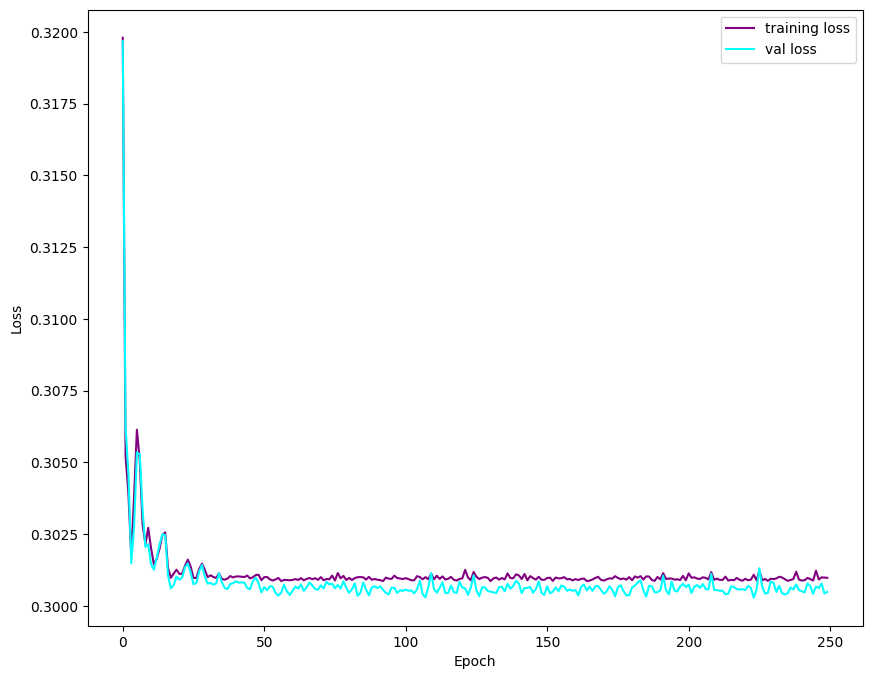

In [16]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses, color='purple', label = "training loss")
plt.plot(val_losses, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 256 Epochs

In [17]:
train_losses_256 = [0.3016064167022705, 0.3017613887786865, 0.30245158076286316, 0.30173417925834656, 0.30134886503219604, 0.3011814057826996, 0.30185645818710327, 0.30103224515914917, 0.3014603853225708, 0.30123475193977356, 0.30097007751464844, 0.3014431893825531, 0.30194807052612305, 0.30136576294898987, 0.30121996998786926, 0.30112022161483765, 0.30118727684020996, 0.30120494961738586, 0.30133700370788574, 0.3012172281742096, 0.30131950974464417, 0.30118077993392944, 0.3010753095149994, 0.3014484941959381, 0.3013788163661957, 0.30114245414733887, 0.300983726978302, 0.3011459708213806, 0.301090806722641, 0.30101001262664795, 0.30107611417770386, 0.30094701051712036, 0.3012024462223053, 0.30109813809394836, 0.3011845052242279, 0.301089346408844, 0.30101341009140015, 0.30109119415283203, 0.30105313658714294, 0.30118995904922485, 0.3010384142398834, 0.30103594064712524, 0.3010001480579376, 0.30135658383369446, 0.30108755826950073, 0.30098068714141846, 0.30105060338974, 0.3011113107204437, 0.30102628469467163, 0.30108964443206787, 0.3011637330055237, 0.3010215163230896, 0.3012242913246155, 0.3009239435195923, 0.30117952823638916, 0.30110085010528564, 0.3009350299835205, 0.3013543486595154, 0.301638126373291, 0.30096128582954407, 0.3009504973888397, 0.30122479796409607, 0.3009849488735199, 0.3009492754936218, 0.3011704087257385, 0.30093976855278015, 0.30096524953842163, 0.30089297890663147, 0.30089423060417175, 0.30104872584342957, 0.3009789288043976, 0.30087876319885254, 0.3010224401950836, 0.30101853609085083, 0.30098584294319153, 0.30087944865226746, 0.30111056566238403, 0.300933837890625, 0.3009377121925354, 0.3010270893573761, 0.30087584257125854, 0.3009464144706726, 0.3009561002254486, 0.3009215295314789, 0.3009227514266968, 0.3009771704673767, 0.30089157819747925, 0.30090704560279846, 0.3009479343891144, 0.3009442985057831, 0.3009105324745178, 0.30135560035705566, 0.30088451504707336, 0.30096855759620667, 0.3009539544582367, 0.30095067620277405, 0.3009392023086548, 0.30125516653060913, 0.300923615694046, 0.30092212557792664, 0.30088987946510315, 0.3008888363838196, 0.3009057641029358, 0.3009277582168579, 0.30091384053230286, 0.300901859998703, 0.300904244184494, 0.3009326457977295, 0.30090075731277466, 0.30089741945266724, 0.30099859833717346, 0.30097413063049316, 0.30088010430336, 0.3009679615497589, 0.30096426606178284, 0.30088040232658386, 0.30091455578804016, 0.3009268343448639, 0.30089348554611206, 0.3009515106678009, 0.30088484287261963, 0.30088669061660767, 0.30095526576042175, 0.30095309019088745, 0.3011956810951233, 0.30088114738464355, 0.3009229302406311, 0.30097055435180664, 0.3010749816894531, 0.3009071350097656, 0.300893634557724, 0.30102357268333435, 0.3009694218635559, 0.3009340465068817, 0.3009328246116638, 0.3009334206581116, 0.300930380821228, 0.3009691834449768, 0.3010120987892151, 0.3009261190891266, 0.3009422719478607, 0.30096444487571716, 0.30100157856941223, 0.3009136915206909, 0.301024466753006, 0.3009245693683624, 0.30092212557792664, 0.3009054362773895, 0.3009895384311676, 0.30089759826660156, 0.3009529709815979, 0.30088356137275696, 0.30089059472084045, 0.3009414076805115, 0.3008715808391571, 0.30091503262519836, 0.3008779287338257, 0.3010038137435913, 0.3009178340435028, 0.3008841574192047, 0.3009193539619446, 0.3009275197982788, 0.30092301964759827, 0.30090808868408203, 0.30099204182624817, 0.30097660422325134, 0.3009311854839325, 0.30091434717178345, 0.30090364813804626, 0.3009847104549408, 0.30100342631340027, 0.301103413105011, 0.30112412571907043, 0.3011518120765686, 0.30092042684555054, 0.30088579654693604, 0.3008788824081421, 0.3009442687034607, 0.30094313621520996, 0.30092552304267883, 0.30092617869377136, 0.3008723556995392, 0.30091074109077454, 0.3009915053844452, 0.3009369671344757, 0.3010842502117157, 0.30089178681373596, 0.30087050795555115, 0.3009546995162964, 0.30090856552124023, 0.3008945882320404, 0.3010355830192566, 0.3008929491043091, 0.3009278178215027, 0.3009200990200043, 0.3009779453277588, 0.3009911775588989, 0.3010037839412689, 0.3009911775588989, 0.3008600175380707, 0.301103800535202, 0.3009490370750427, 0.3009031414985657, 0.3009224534034729, 0.3010142743587494, 0.3009297549724579, 0.30089622735977173, 0.3008875250816345, 0.30089232325553894, 0.30092835426330566, 0.30090075731277466, 0.300930380821228, 0.3009468615055084, 0.30089014768600464, 0.3008574843406677, 0.3008612394332886, 0.3008861839771271, 0.3009043037891388, 0.3008725345134735, 0.30094030499458313, 0.3008780777454376, 0.3009907007217407, 0.3010489344596863, 0.30101969838142395, 0.30090877413749695, 0.3008742928504944, 0.3009558320045471, 0.3009120523929596, 0.30088216066360474, 0.3009036183357239, 0.30092117190361023, 0.30088144540786743, 0.30090904235839844, 0.30089959502220154, 0.3009539842605591, 0.3008939325809479, 0.30085289478302, 0.30089128017425537, 0.3009011149406433, 0.3009192645549774, 0.30089497566223145, 0.300864040851593, 0.3008701503276825, 0.3008560538291931, 0.3008587062358856, 0.3008825182914734, 0.3008769154548645, 0.3009439706802368, 0.3008805215358734, 0.3008864223957062]

val_losses_256 = [0.30142295360565186, 0.30128636956214905, 0.3026318848133087, 0.301548033952713, 0.3007901906967163, 0.30084583163261414, 0.30167901515960693, 0.30069828033447266, 0.30146124958992004, 0.30084362626075745, 0.30054035782814026, 0.3010016083717346, 0.3010423183441162, 0.30102768540382385, 0.3007981777191162, 0.30064117908477783, 0.30105215311050415, 0.30116739869117737, 0.30082637071609497, 0.30056044459342957, 0.30054324865341187, 0.30095645785331726, 0.30050498247146606, 0.30073821544647217, 0.30055859684944153, 0.300550639629364, 0.30057215690612793, 0.30089229345321655, 0.3005739450454712, 0.30071133375167847, 0.3010387718677521, 0.3005453944206238, 0.3005181849002838, 0.30069223046302795, 0.30077481269836426, 0.3007836937904358, 0.30078500509262085, 0.30087488889694214, 0.300466924905777, 0.30065518617630005, 0.3004997968673706, 0.3006882667541504, 0.30068495869636536, 0.30087539553642273, 0.30086785554885864, 0.30047792196273804, 0.30061474442481995, 0.30068859457969666, 0.3008372485637665, 0.3005509078502655, 0.300690621137619, 0.3006703555583954, 0.30072686076164246, 0.3004821538925171, 0.3008371889591217, 0.3008025884628296, 0.3005772829055786, 0.3011905550956726, 0.3015466034412384, 0.3006450831890106, 0.3006155490875244, 0.3007483184337616, 0.30077818036079407, 0.3006708323955536, 0.30085399746894836, 0.3006066679954529, 0.30067193508148193, 0.30065155029296875, 0.30077192187309265, 0.30082714557647705, 0.3007260262966156, 0.30054590106010437, 0.30075201392173767, 0.30102425813674927, 0.3006075322628021, 0.30052870512008667, 0.30099955201148987, 0.30055952072143555, 0.30063188076019287, 0.3006589710712433, 0.3005604147911072, 0.30059418082237244, 0.30050793290138245, 0.30057448148727417, 0.3006449341773987, 0.30062729120254517, 0.3005715310573578, 0.300555020570755, 0.30038368701934814, 0.3006935119628906, 0.3005061149597168, 0.3009485602378845, 0.3005813956260681, 0.300416499376297, 0.30043962597846985, 0.3006115257740021, 0.3004404604434967, 0.3011105954647064, 0.3006075322628021, 0.30072370171546936, 0.30054712295532227, 0.3004685342311859, 0.3006693124771118, 0.30056867003440857, 0.30051711201667786, 0.30049848556518555, 0.30061012506484985, 0.3007104992866516, 0.3006835877895355, 0.30061614513397217, 0.30067822337150574, 0.300920307636261, 0.3005715608596802, 0.3006689250469208, 0.3006345331668854, 0.3005320727825165, 0.30065712332725525, 0.3004758059978485, 0.30063167214393616, 0.30040988326072693, 0.3005743622779846, 0.3004603087902069, 0.3005235195159912, 0.300603985786438, 0.3009207844734192, 0.30057448148727417, 0.30054086446762085, 0.30042150616645813, 0.30045488476753235, 0.3006031811237335, 0.30066612362861633, 0.30091002583503723, 0.3007015287876129, 0.3006071448326111, 0.30061861872673035, 0.3006407618522644, 0.3006521165370941, 0.3006115257740021, 0.3006593883037567, 0.30058860778808594, 0.3004918396472931, 0.3005884289741516, 0.30074775218963623, 0.3004816174507141, 0.3006478548049927, 0.3004486858844757, 0.3004021942615509, 0.3005950152873993, 0.30062031745910645, 0.30060288310050964, 0.3006465435028076, 0.3004169464111328, 0.300484299659729, 0.3006524443626404, 0.30050909519195557, 0.3005388677120209, 0.3005523979663849, 0.30059486627578735, 0.30040180683135986, 0.3005136549472809, 0.3005523085594177, 0.30042871832847595, 0.3006357252597809, 0.3006053864955902, 0.30062946677207947, 0.30060654878616333, 0.3005422353744507, 0.3005436062812805, 0.3006565272808075, 0.30073875188827515, 0.3006359040737152, 0.3008536696434021, 0.30100417137145996, 0.3009265959262848, 0.3005855977535248, 0.30047106742858887, 0.3005955219268799, 0.30065059661865234, 0.3005741536617279, 0.3006783425807953, 0.30052560567855835, 0.3005194664001465, 0.3004816770553589, 0.3007524907588959, 0.30072444677352905, 0.3007822334766388, 0.30066385865211487, 0.3005610406398773, 0.30068790912628174, 0.30067208409309387, 0.3006056845188141, 0.3006901741027832, 0.3004981577396393, 0.3007006049156189, 0.3006093502044678, 0.3007359504699707, 0.3007223904132843, 0.3007638454437256, 0.30076685547828674, 0.30052709579467773, 0.3008882403373718, 0.3008842468261719, 0.30055883526802063, 0.30058547854423523, 0.3007018268108368, 0.30057814717292786, 0.30052679777145386, 0.30061376094818115, 0.30063313245773315, 0.300733357667923, 0.3007562756538391, 0.30066901445388794, 0.3006528913974762, 0.30046316981315613, 0.30052757263183594, 0.300552636384964, 0.30057990550994873, 0.30055826902389526, 0.3006282150745392, 0.3005582094192505, 0.3006170094013214, 0.3005739450454712, 0.30074018239974976, 0.30069592595100403, 0.30062586069107056, 0.3005872666835785, 0.3005560040473938, 0.30056095123291016, 0.3006012737751007, 0.3006589412689209, 0.300766259431839, 0.30066072940826416, 0.3005545735359192, 0.30053821206092834, 0.30053213238716125, 0.3005480170249939, 0.3005538880825043, 0.30066484212875366, 0.300785094499588, 0.300443559885025, 0.3006591796875, 0.300634503364563, 0.3005641996860504, 0.3005305528640747, 0.3005567193031311, 0.30048301815986633, 0.3005710244178772, 0.3004955053329468, 0.30058908462524414, 0.300692617893219]


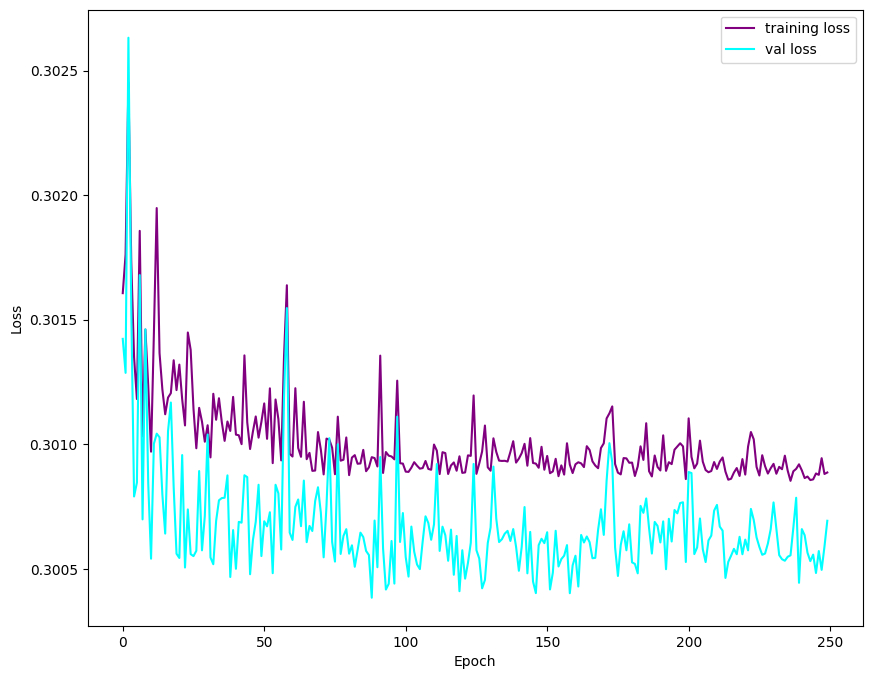

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses_256, color='purple', label = "training loss")
plt.plot(val_losses_256, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

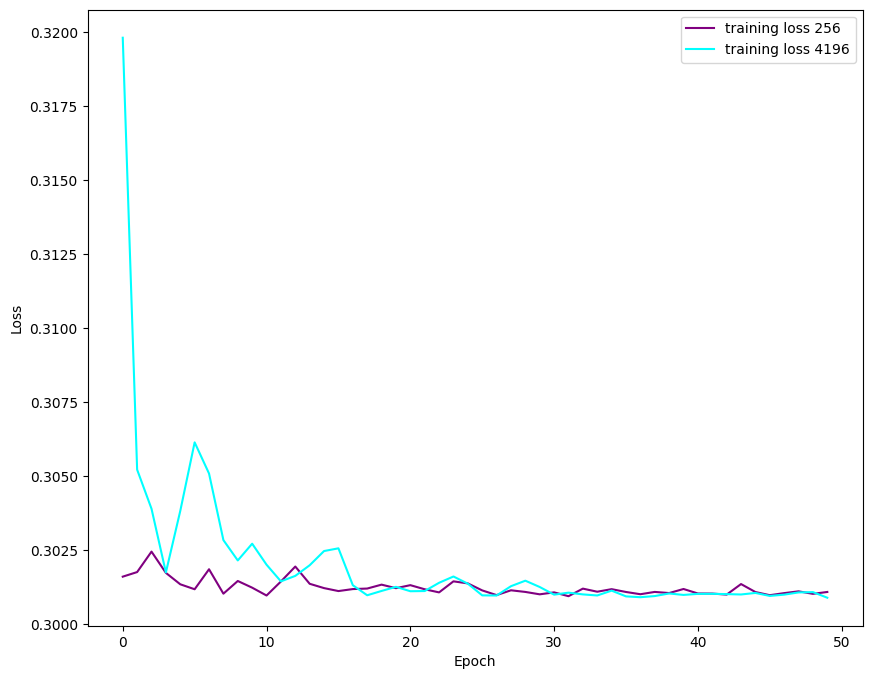

In [20]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses_256[:50], color='purple', label = "training loss 256")
plt.plot(train_losses[:50], color='aqua', label = "training loss 4196")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Decision:** let's train for 20 epochs only!

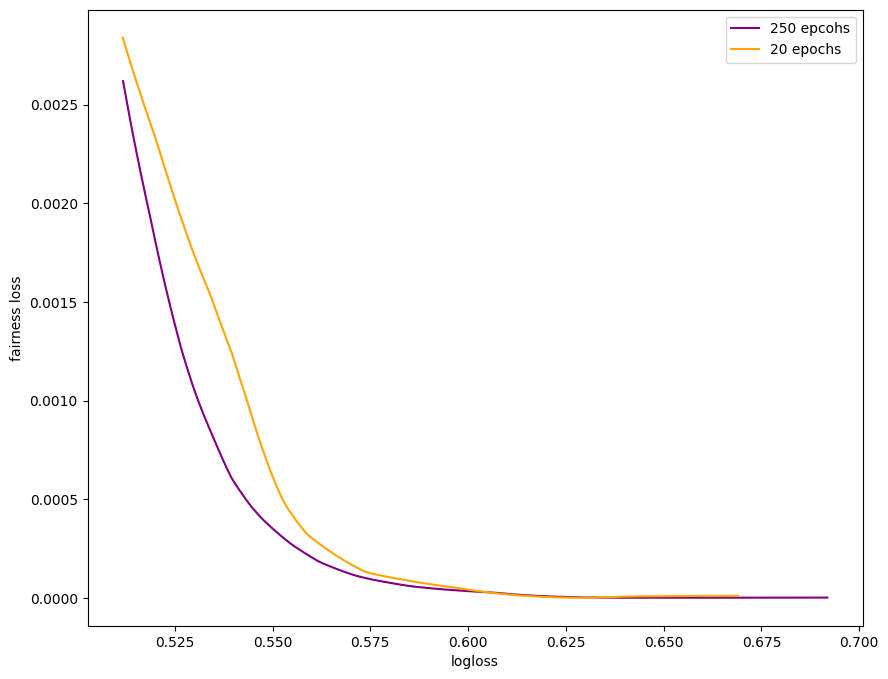

In [24]:
compare_experiments_2d("exp40", "exp40v2", legend_labels = ["250 epcohs", "20 epochs"])

**Conclusion:** bad decision! Let's use 50 now!

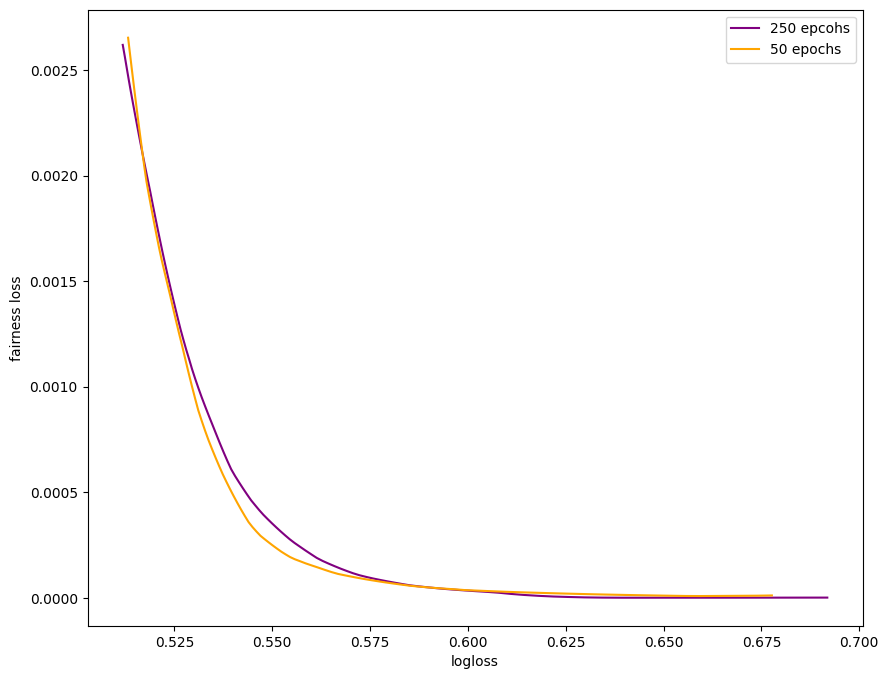

In [27]:
compare_experiments_2d("exp40", "exp40v2", legend_labels = ["250 epcohs", "50 epochs"])

## Experiment 40 (group fairness loss vs logloss)


In [51]:
print_exp_info("exp40", False)

name:::exp40
descr:::Group Fairness loss vs logloss, hypernetworks


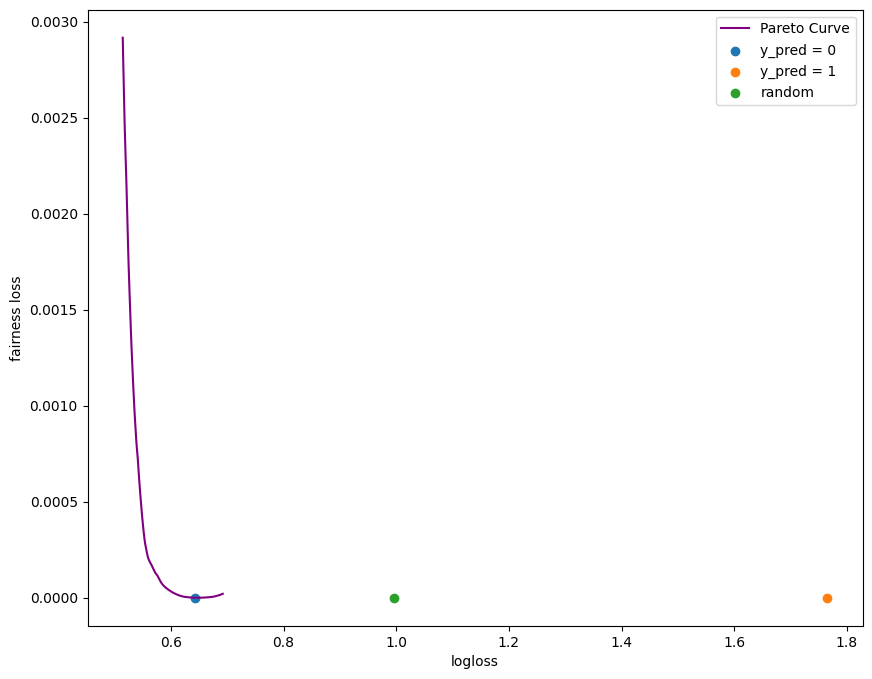

In [35]:
visualize_2d_results("exp40", ["logloss", "fairness loss"], False, False,
                     baseline_pts = [p[:2] for p in baseline_losses],
                     baseline_lbls = baseline_lables
                    )

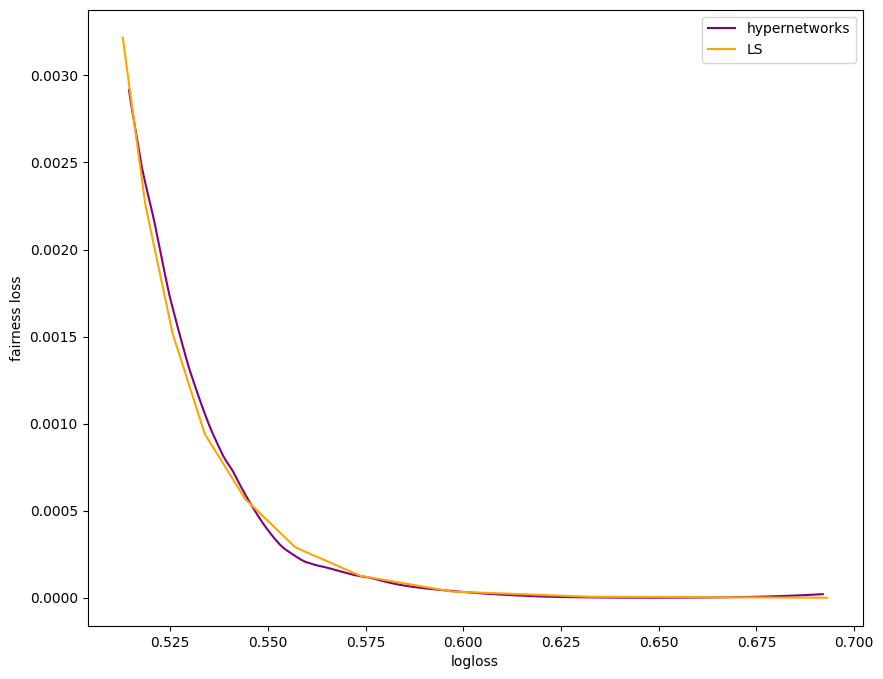

In [10]:
compare_experiments_2d("exp40", "exp41")

## Experiment 43 (ind vs logloss, 3-MLP)

In [38]:
print_exp_info("exp43", False)

name:::exp43
descr:::Ind Fairness loss vs logloss, hypernetworks


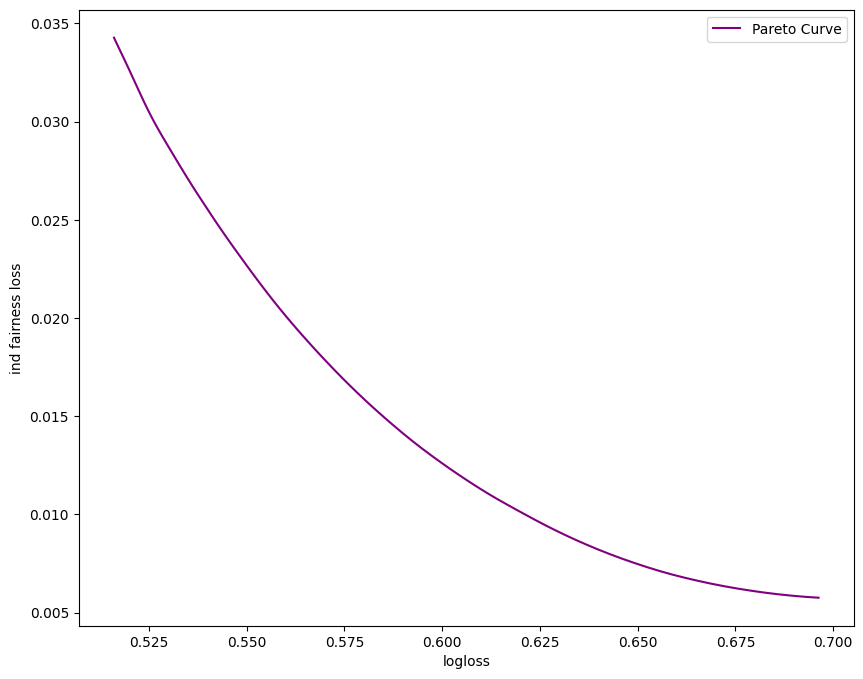

In [39]:
visualize_2d_results("exp43", ["logloss", "ind fairness loss"], False, False)

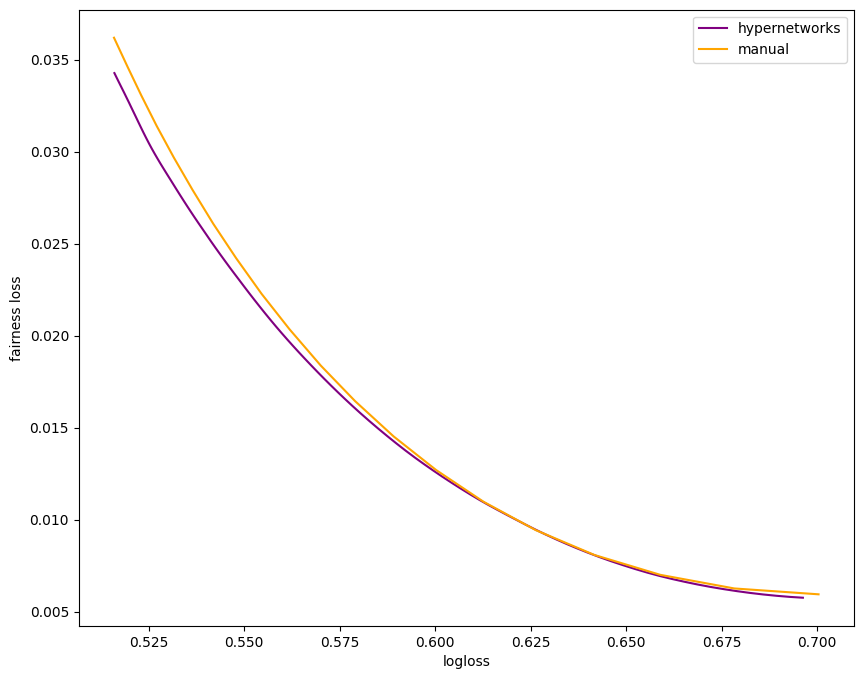

In [40]:
compare_experiments_2d("exp43", "exp43base")

## Experiment 44 (adv robustness vs logloss, 3-MLP)

In [41]:
print_exp_info("exp44", False)

name:::exp44
descr:::Adv Robustness loss vs logloss, hypernetworks


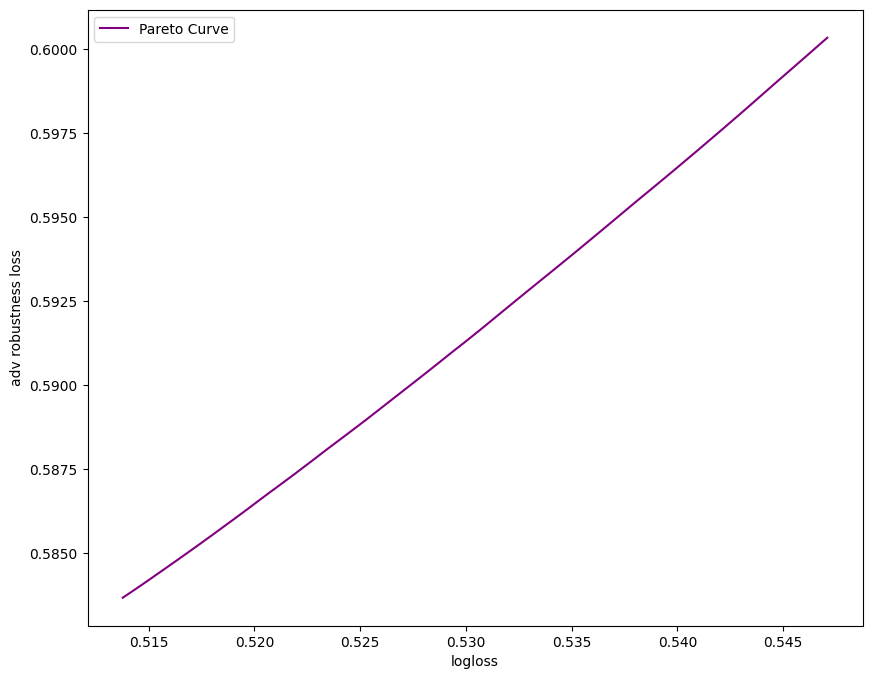

In [42]:
visualize_2d_results("exp44", ["logloss", "adv robustness loss"], False, False)

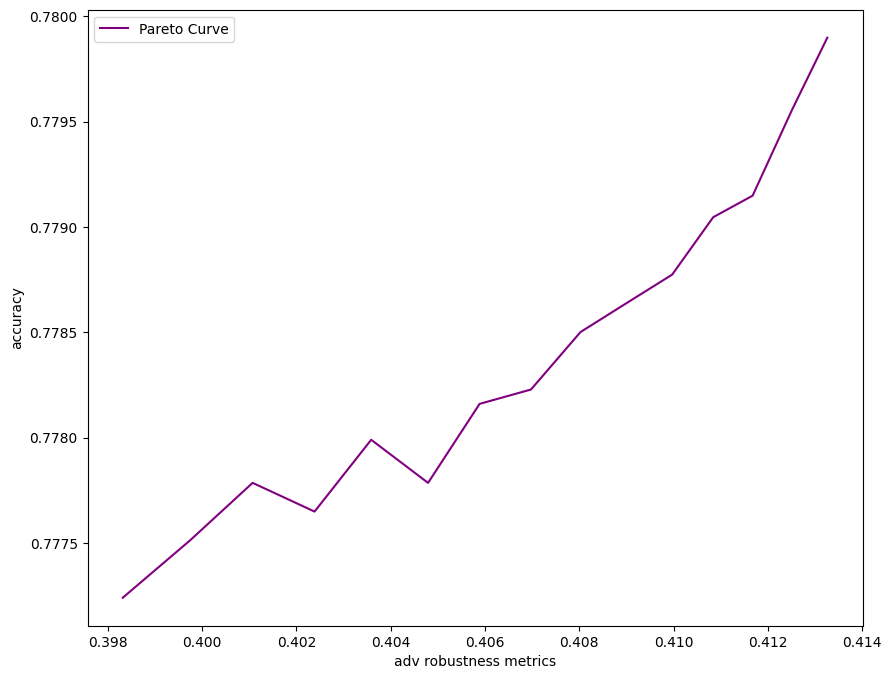

In [43]:
visualize_2d_results("exp44metrics", ["accuracy", "adv robustness metrics"], True, False) # 3000 iterations, 4096 batch size

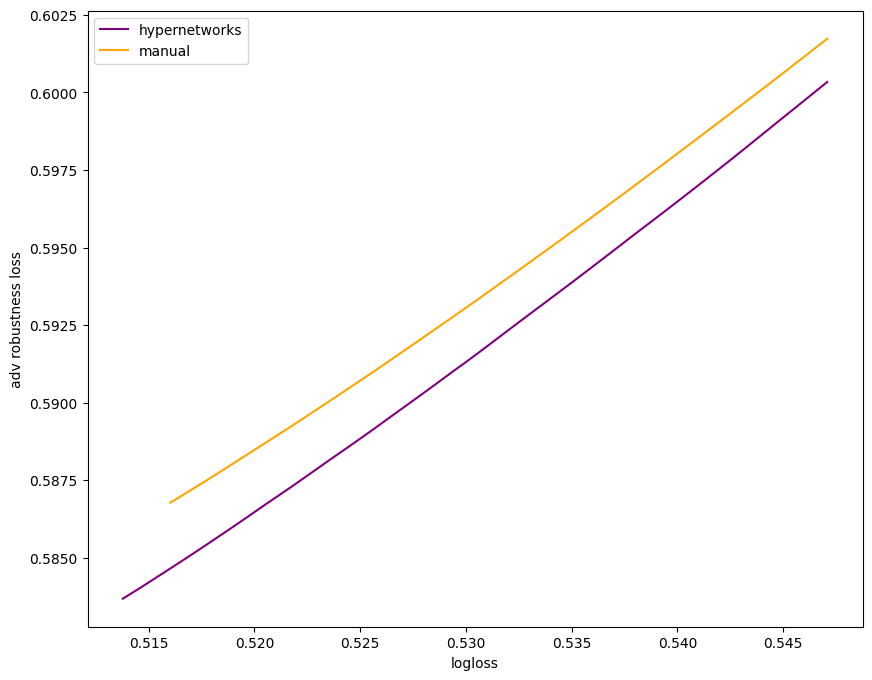

In [44]:
compare_experiments_2d("exp44", "exp44base", labels=["logloss", "adv robustness loss"])

# 3D

## Exp 46 :  logloss vs group fairness vs l2 pairwise robustness 

### Training

In [45]:
train_losses = [0.21794912219047546, 0.21047821640968323, 0.21023085713386536, 0.20863917469978333, 0.2075687199831009, 0.20737968385219574, 0.20746615529060364, 0.2078799307346344, 0.20856907963752747, 0.20939858257770538, 0.21026918292045593, 0.2085610330104828, 0.20707936584949493, 0.20692598819732666, 0.20764659345149994, 0.20817524194717407, 0.20771706104278564, 0.20749840140342712, 0.20737658441066742, 0.20755323767662048, 0.20734412968158722, 0.20707018673419952, 0.20707237720489502, 0.2071564942598343, 0.20741713047027588, 0.2071683704853058, 0.2070195972919464, 0.20708617568016052, 0.2069403976202011, 0.20693360269069672, 0.20692992210388184, 0.20697548985481262, 0.20708274841308594, 0.20697656273841858, 0.2070009410381317, 0.2069144994020462, 0.2068995088338852, 0.2069014459848404, 0.20690244436264038, 0.20692916214466095, 0.20697224140167236, 0.20695945620536804, 0.20696990191936493, 0.2069140523672104, 0.20699594914913177, 0.2069859504699707, 0.20707742869853973, 0.20706357061862946, 0.2070714384317398, 0.20688779652118683]

val_losses = [0.21828539669513702, 0.21069717407226562, 0.21013236045837402, 0.20837357640266418, 0.20734627544879913, 0.20713165402412415, 0.20700781047344208, 0.20731213688850403, 0.2080998718738556, 0.2090970277786255, 0.21016252040863037, 0.2084510326385498, 0.20687223970890045, 0.20663323998451233, 0.207298144698143, 0.20799626410007477, 0.20754264295101166, 0.20722898840904236, 0.20710060000419617, 0.20738153159618378, 0.20716442167758942, 0.2067798674106598, 0.20673054456710815, 0.20702005922794342, 0.2074166238307953, 0.20708070695400238, 0.20678925514221191, 0.2067853808403015, 0.2066992074251175, 0.2067089080810547, 0.2066304087638855, 0.20668937265872955, 0.20684248208999634, 0.20678958296775818, 0.20679152011871338, 0.2066955715417862, 0.2066415399312973, 0.2066362053155899, 0.20663762092590332, 0.20668306946754456, 0.20679834485054016, 0.2068295180797577, 0.2067500352859497, 0.20671923458576202, 0.20693381130695343, 0.20687082409858704, 0.20684170722961426, 0.20676490664482117, 0.20679603517055511, 0.20675474405288696]


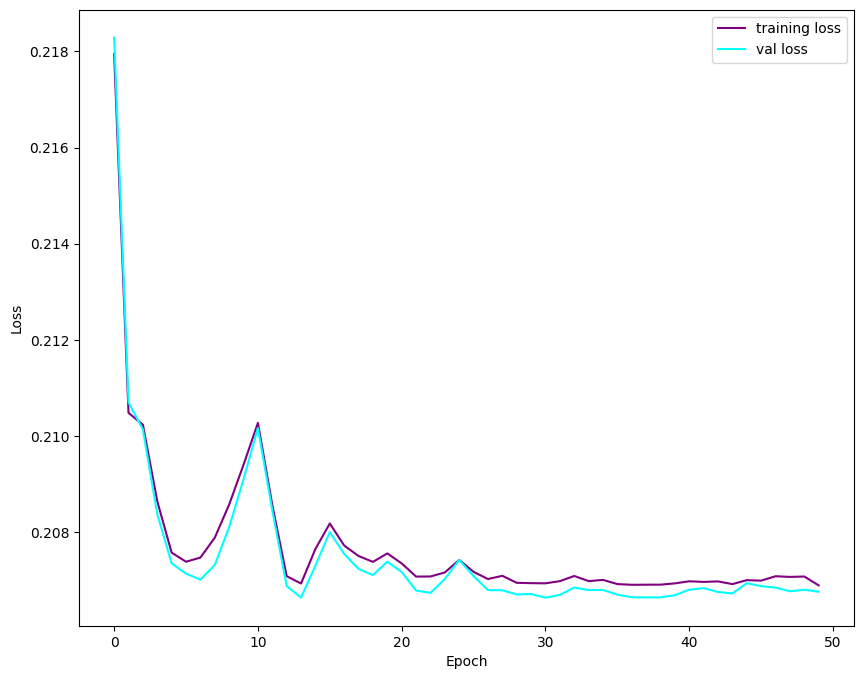

In [46]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses, color='purple', label = "training loss")
plt.plot(val_losses, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

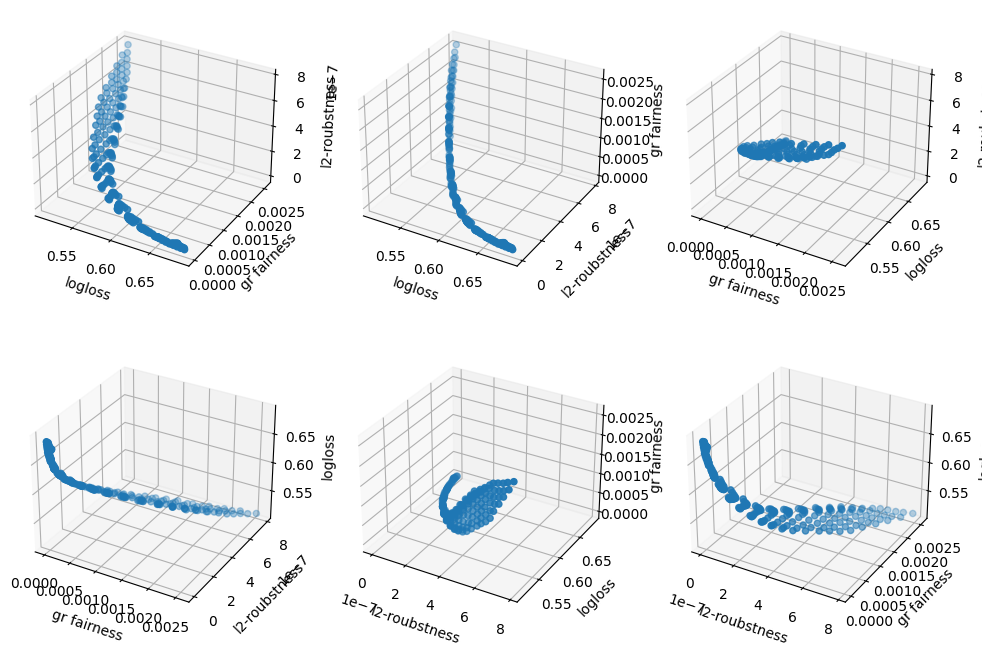

In [10]:
visualize_3d_results("exp46", mode='3D', labels = ["logloss", "gr fairness", "l2-roubstness"])

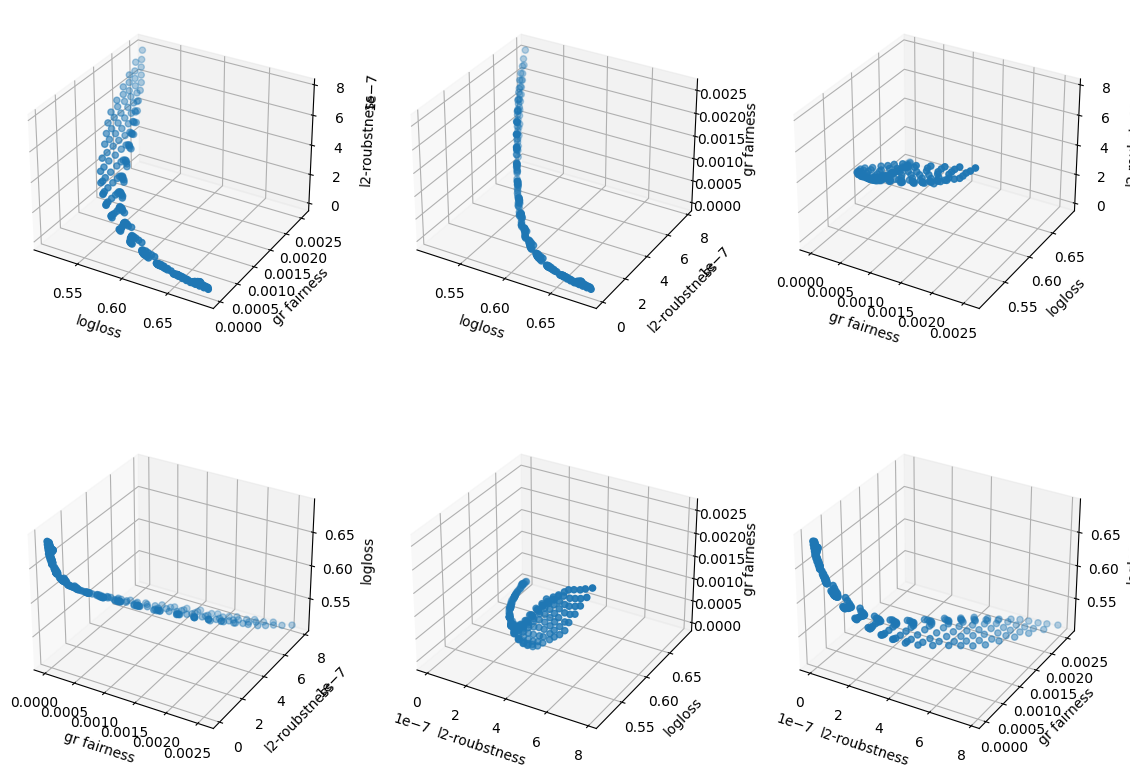

In [8]:
visualize_3d_results("exp46", mode='3D', labels = ["logloss", "gr fairness", "l2-roubstness"])

### base experiment 

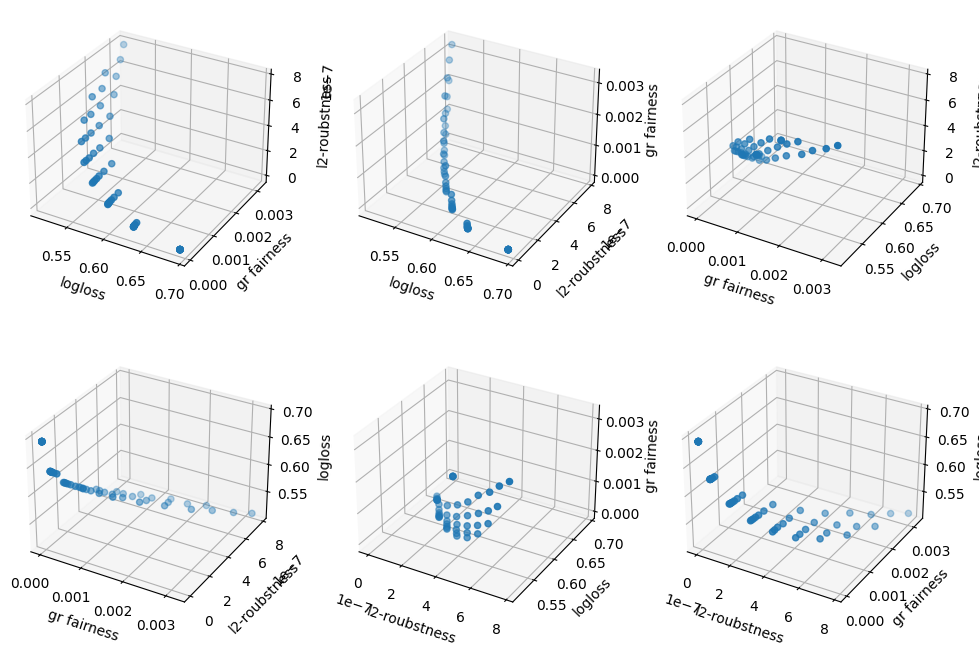

In [11]:
visualize_3d_results("exp46base", mode='3D', labels = ["logloss", "gr fairness", "l2-roubstness"])

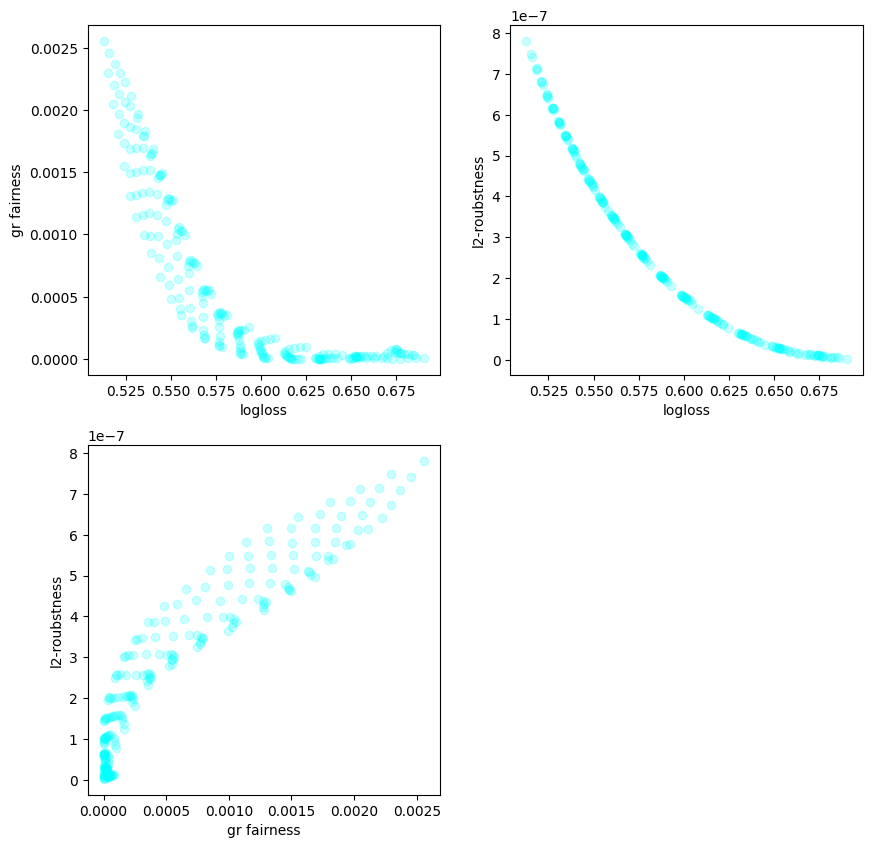

In [90]:
visualize_3d_results_projections("exp46", labels = ["logloss", "gr fairness", "l2-roubstness"])

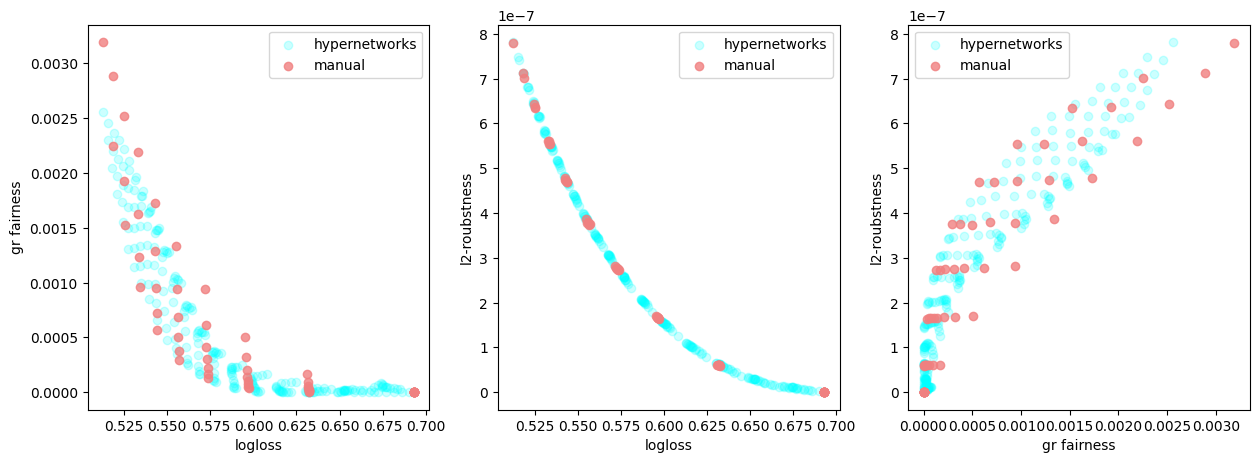

In [16]:
compare_3d_results_projections("exp46", "exp46base", labels = ["logloss", "gr fairness", "l2-roubstness"])

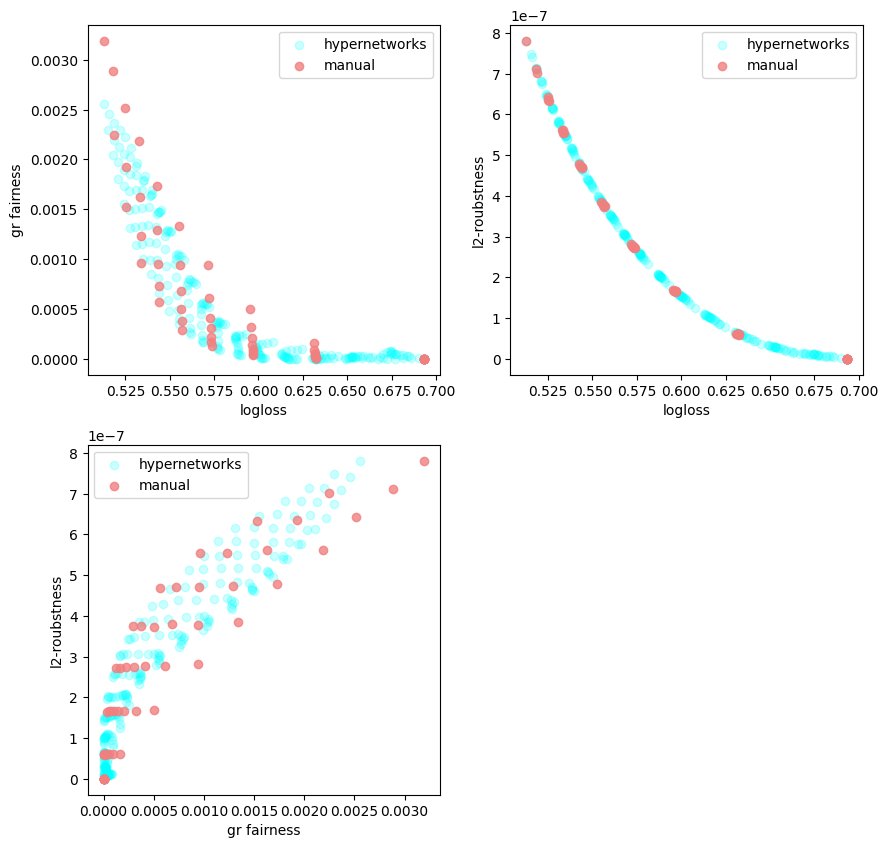

In [93]:
compare_3d_results_projections("exp46", "exp46base", labels = ["logloss", "gr fairness", "l2-roubstness"])

## Exp 47: logloss vs group fairness vs adv robustness

### Training

In [51]:
train_losses = [0.42652368545532227, 0.41407090425491333, 0.41149982810020447, 0.41084668040275574, 0.4113203287124634, 0.41076964139938354, 0.41241997480392456, 0.41477736830711365, 0.41416385769844055, 0.4116103947162628, 0.4103218615055084, 0.41048210859298706, 0.41095656156539917, 0.4109804630279541, 0.4109039306640625, 0.4106750786304474, 0.4105531573295593, 0.4106450080871582, 0.41083085536956787, 0.41115739941596985, 0.410829097032547, 0.4104496240615845, 0.41036736965179443, 0.4103172719478607, 0.41059160232543945, 0.41084834933280945, 0.41056692600250244, 0.410429447889328, 0.41042548418045044, 0.4106613099575043, 0.41066256165504456, 0.4104694426059723, 0.4104033410549164, 0.4104118049144745, 0.41047999262809753, 0.41054707765579224, 0.41059303283691406, 0.41045206785202026, 0.4104452431201935, 0.41050609946250916, 0.4104688763618469, 0.41053444147109985, 0.4105125367641449, 0.4103541970252991, 0.4103662967681885, 0.4105389416217804, 0.4105933606624603, 0.4103700816631317, 0.4104873836040497, 0.41046789288520813]

val_losses = [0.4252530336380005, 0.4137459993362427, 0.4114668369293213, 0.4104492664337158, 0.41051724553108215, 0.40952324867248535, 0.4110998809337616, 0.4138564169406891, 0.4135516881942749, 0.41119810938835144, 0.4097355604171753, 0.4094429612159729, 0.4095180630683899, 0.40949612855911255, 0.40965020656585693, 0.4097672998905182, 0.4097890853881836, 0.4097495675086975, 0.409595251083374, 0.4097982347011566, 0.40955495834350586, 0.40944141149520874, 0.4095473885536194, 0.4095199406147003, 0.4095174968242645, 0.40966686606407166, 0.40959829092025757, 0.4096430838108063, 0.40956777334213257, 0.4095911979675293, 0.4095635414123535, 0.4094565510749817, 0.40942028164863586, 0.4093584418296814, 0.40933942794799805, 0.40943580865859985, 0.40955519676208496, 0.409367173910141, 0.4093775451183319, 0.4093458354473114, 0.40937158465385437, 0.4094342589378357, 0.409324586391449, 0.40945959091186523, 0.4095032215118408, 0.409605473279953, 0.40941306948661804, 0.40933337807655334, 0.40957602858543396, 0.40942737460136414]


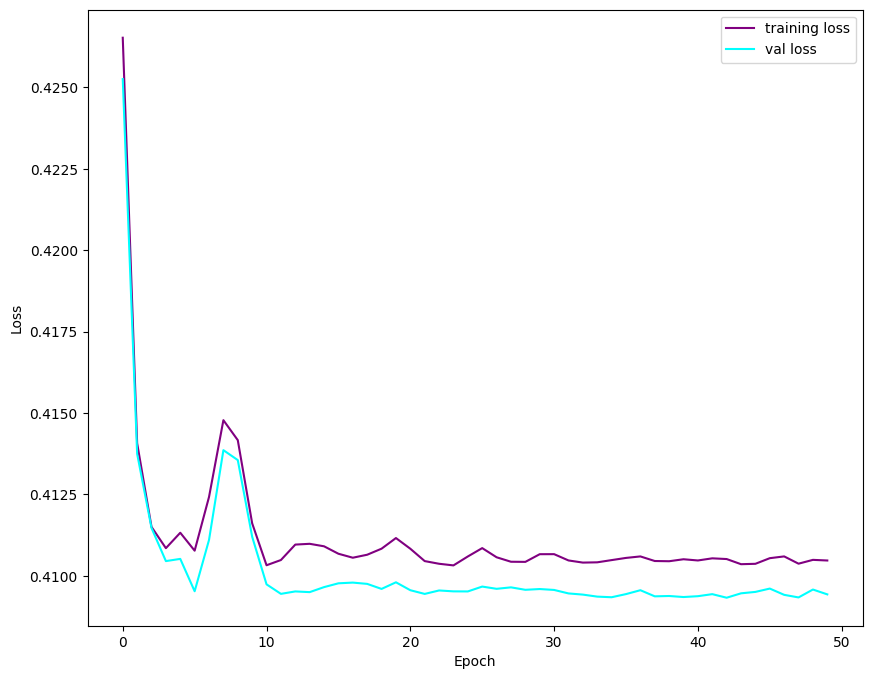

In [52]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses, color='purple', label = "training loss")
plt.plot(val_losses, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

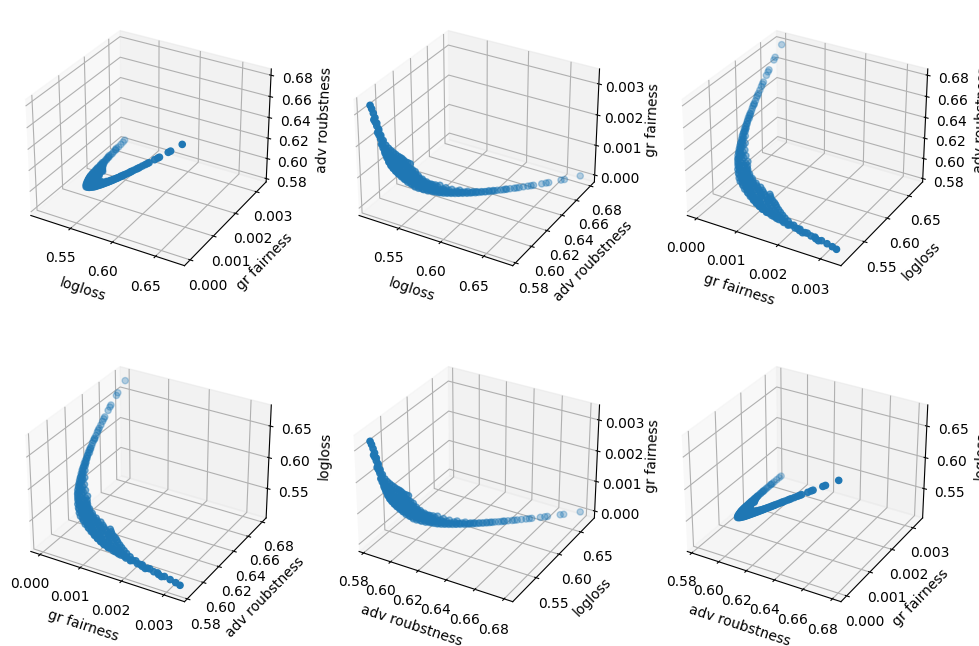

In [10]:
visualize_3d_results("exp47", mode='3D', labels = ["logloss", "gr fairness", "adv roubstness"])

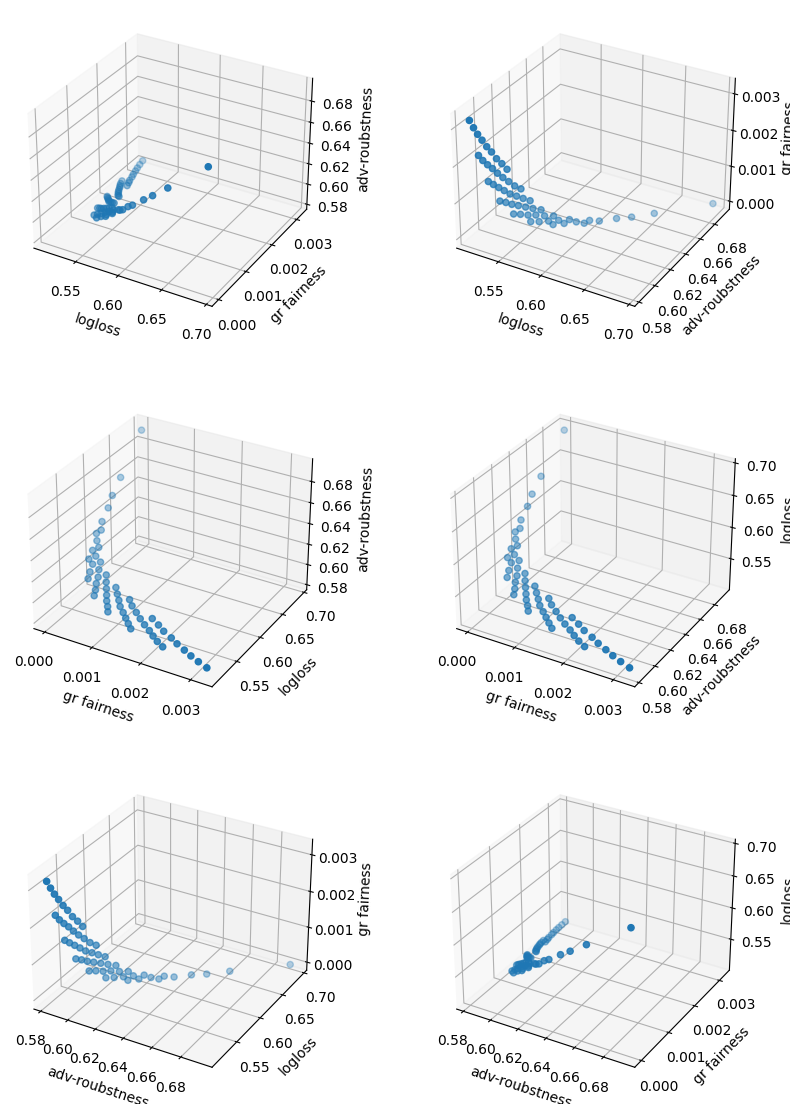

In [79]:
visualize_3d_results("exp47base", mode='3D', labels = ["logloss", "gr fairness", "adv-roubstness"])

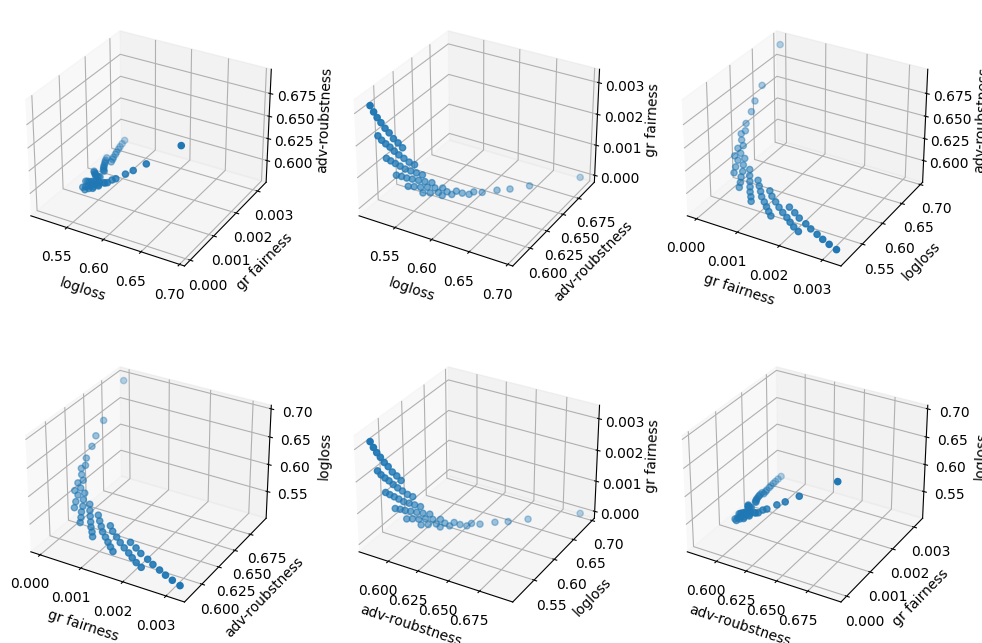

In [9]:
visualize_3d_results("exp47base", mode='3D', labels = ["logloss", "gr fairness", "adv-roubstness"])

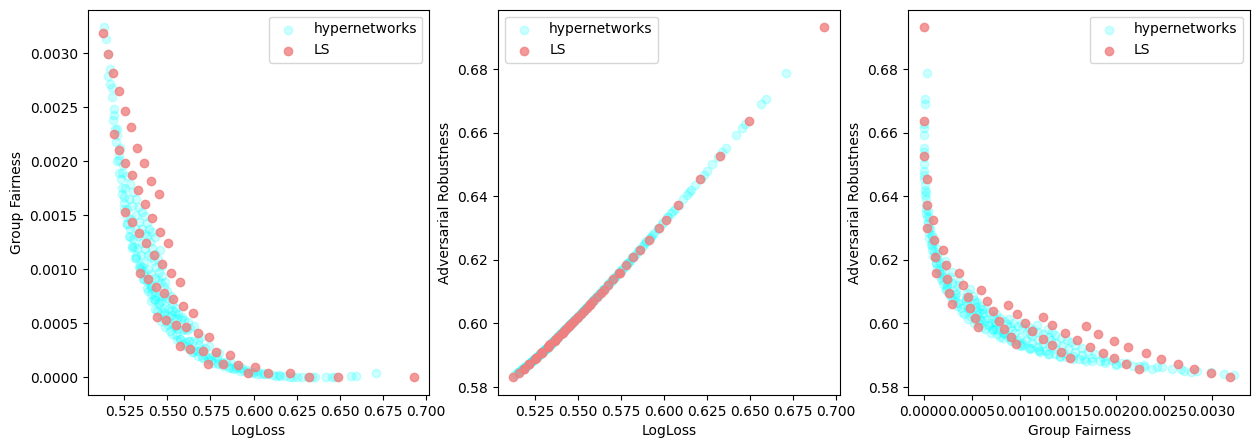

In [42]:
compare_3d_results_projections("exp47", "exp47base", labels = ["LogLoss", "Group Fairness", "Adversarial Robustness"],
                              legend_labels = ["hypernetworks", "LS"])

# 4D

## Exp 48 logloss vs gr fair vs ind fair vs pairwise robustness l2 loss

In [81]:
train_losses = [0.1702340990304947, 0.16333742439746857, 0.16257807612419128, 0.1626596748828888, 0.1628047525882721, 0.1623016595840454, 0.16236653923988342, 0.1633586287498474, 0.16293418407440186, 0.16234184801578522, 0.16297020018100739, 0.16285350918769836, 0.16221126914024353, 0.16222581267356873, 0.16225828230381012, 0.16262009739875793, 0.16287897527217865, 0.16266164183616638, 0.16225087642669678, 0.16245615482330322, 0.16221053898334503, 0.16221007704734802, 0.162334606051445, 0.16234087944030762, 0.16229107975959778, 0.16272729635238647, 0.16261713206768036, 0.16228926181793213, 0.1623777598142624, 0.16219457983970642, 0.1623990386724472, 0.16228294372558594, 0.16227760910987854, 0.1622982919216156, 0.16225610673427582, 0.16214601695537567, 0.16223140060901642, 0.16229236125946045, 0.1623237431049347, 0.16243557631969452, 0.16219286620616913, 0.16218283772468567, 0.1622650921344757, 0.16221681237220764, 0.16227994859218597, 0.16233396530151367, 0.16233138740062714, 0.16221527755260468, 0.1624384969472885, 0.16219814121723175]

val_losses = [0.17018663883209229, 0.16332188248634338, 0.16265282034873962, 0.16284191608428955, 0.16297733783721924, 0.16232402622699738, 0.1622713953256607, 0.1630961149930954, 0.1627427041530609, 0.16232040524482727, 0.16297537088394165, 0.16283635795116425, 0.16216331720352173, 0.1621500551700592, 0.16215389966964722, 0.16250835359096527, 0.16280169785022736, 0.16264410316944122, 0.16220404207706451, 0.1623436063528061, 0.16215477883815765, 0.16217772662639618, 0.1622733622789383, 0.1622219830751419, 0.1621665060520172, 0.16262446343898773, 0.16254879534244537, 0.16221687197685242, 0.16224029660224915, 0.1620553880929947, 0.16228936612606049, 0.16221439838409424, 0.16219325363636017, 0.1621805727481842, 0.16213268041610718, 0.16206859052181244, 0.16214975714683533, 0.16218595206737518, 0.16218173503875732, 0.1623084396123886, 0.16214871406555176, 0.16215917468070984, 0.162165567278862, 0.16210898756980896, 0.16217617690563202, 0.16223813593387604, 0.1622341126203537, 0.16208955645561218, 0.16236093640327454, 0.16218583285808563]


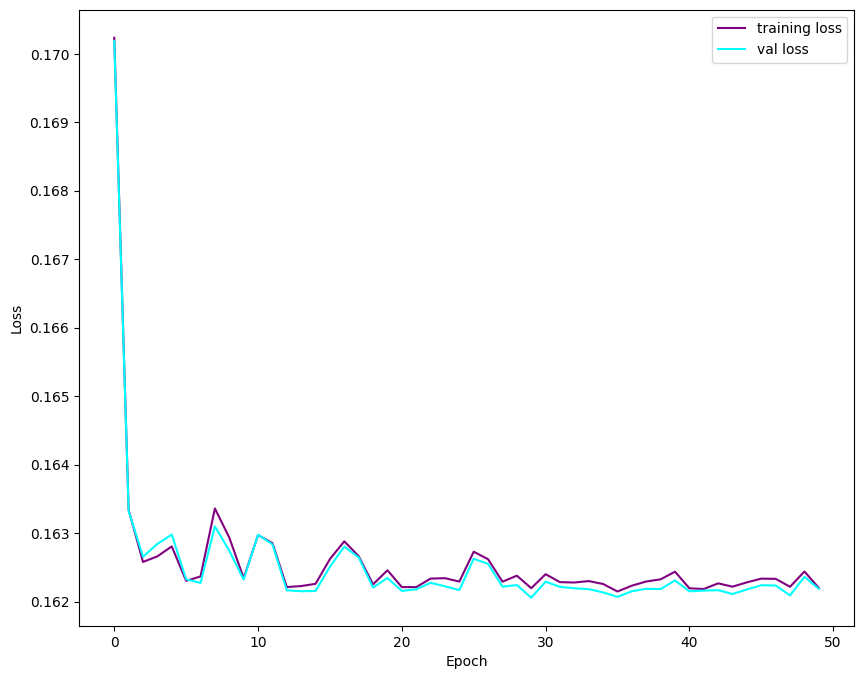

In [82]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses, color='purple', label = "training loss")
plt.plot(val_losses, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

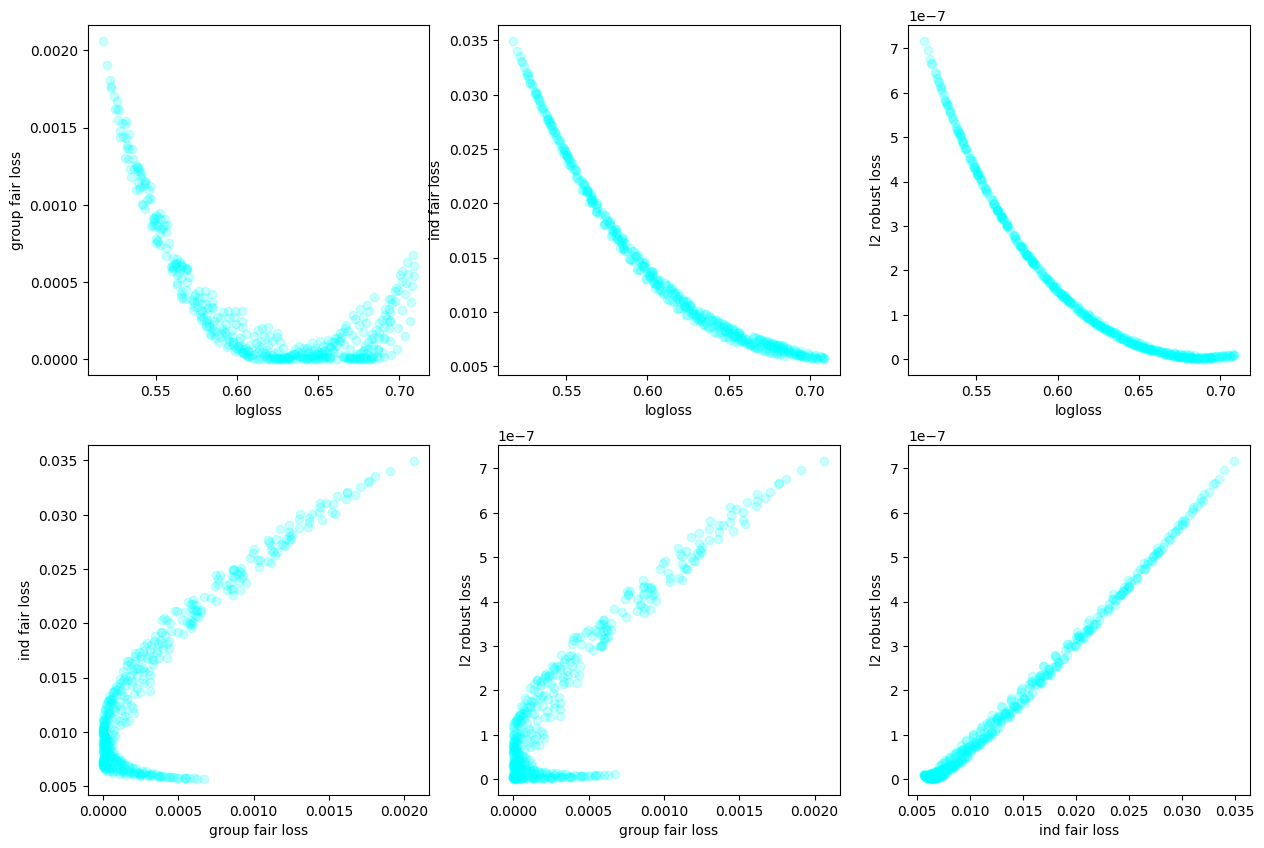

In [22]:
visualize_results_projections("exp48", dim=4, labels = ['logloss', "group fair loss", "ind fair loss", "l2 robust loss"])

## Exp 48: logloss vs gr fair vs ind fair vs adv robustness loss

In [116]:
train_losses = [0.34783855080604553, 0.3289303183555603, 0.3216902017593384, 0.3189184367656708, 0.3184225857257843, 0.3185032904148102, 0.31871265172958374, 0.3189355134963989, 0.3191080093383789, 0.3186556398868561, 0.3196941018104553, 0.3206709921360016, 0.3204772472381592, 0.3194863498210907, 0.31864458322525024, 0.31861579418182373, 0.3188629150390625, 0.31944453716278076, 0.31951263546943665, 0.3190973401069641, 0.31885436177253723, 0.31878650188446045, 0.318927139043808, 0.3192518353462219, 0.3198159635066986, 0.320146769285202, 0.3187321126461029, 0.3184271454811096, 0.3184114396572113, 0.31881386041641235, 0.319132536649704, 0.3186497390270233, 0.31849557161331177, 0.31849122047424316, 0.3185248374938965, 0.3187476396560669, 0.3186073303222656, 0.3185490667819977, 0.31860679388046265, 0.3185584247112274, 0.31853237748146057, 0.3186512589454651, 0.3185250163078308, 0.3187411427497864, 0.31888502836227417, 0.3186137080192566, 0.3185197710990906, 0.31844601035118103, 0.318468302488327, 0.31856152415275574]

val_losses = [0.3480551540851593, 0.32898658514022827, 0.3218168616294861, 0.3189365863800049, 0.3181103467941284, 0.31781354546546936, 0.31782686710357666, 0.3181283175945282, 0.31839606165885925, 0.3180093765258789, 0.319180428981781, 0.32030460238456726, 0.32019665837287903, 0.31929492950439453, 0.3183301091194153, 0.3181167244911194, 0.31831395626068115, 0.3189330995082855, 0.31906068325042725, 0.3187406063079834, 0.3185325860977173, 0.31843268871307373, 0.3185177743434906, 0.3189065456390381, 0.31943878531455994, 0.3197169899940491, 0.3183833956718445, 0.3182281255722046, 0.3181817829608917, 0.31847336888313293, 0.31871554255485535, 0.31833723187446594, 0.31817859411239624, 0.3180199861526489, 0.3180881142616272, 0.31834203004837036, 0.3182983696460724, 0.3182733356952667, 0.3182336091995239, 0.3181823790073395, 0.31821420788764954, 0.31833216547966003, 0.31826508045196533, 0.318477600812912, 0.3186183273792267, 0.3182750344276428, 0.3181699812412262, 0.318193644285202, 0.31825730204582214, 0.31834089756011963]


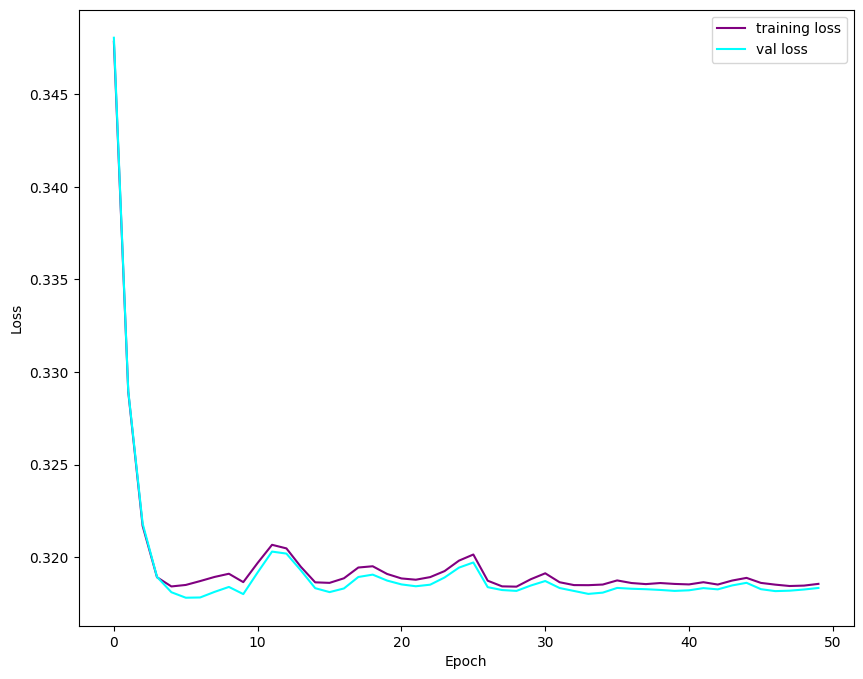

In [117]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_losses, color='purple', label = "training loss")
plt.plot(val_losses, color='aqua', label = "val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

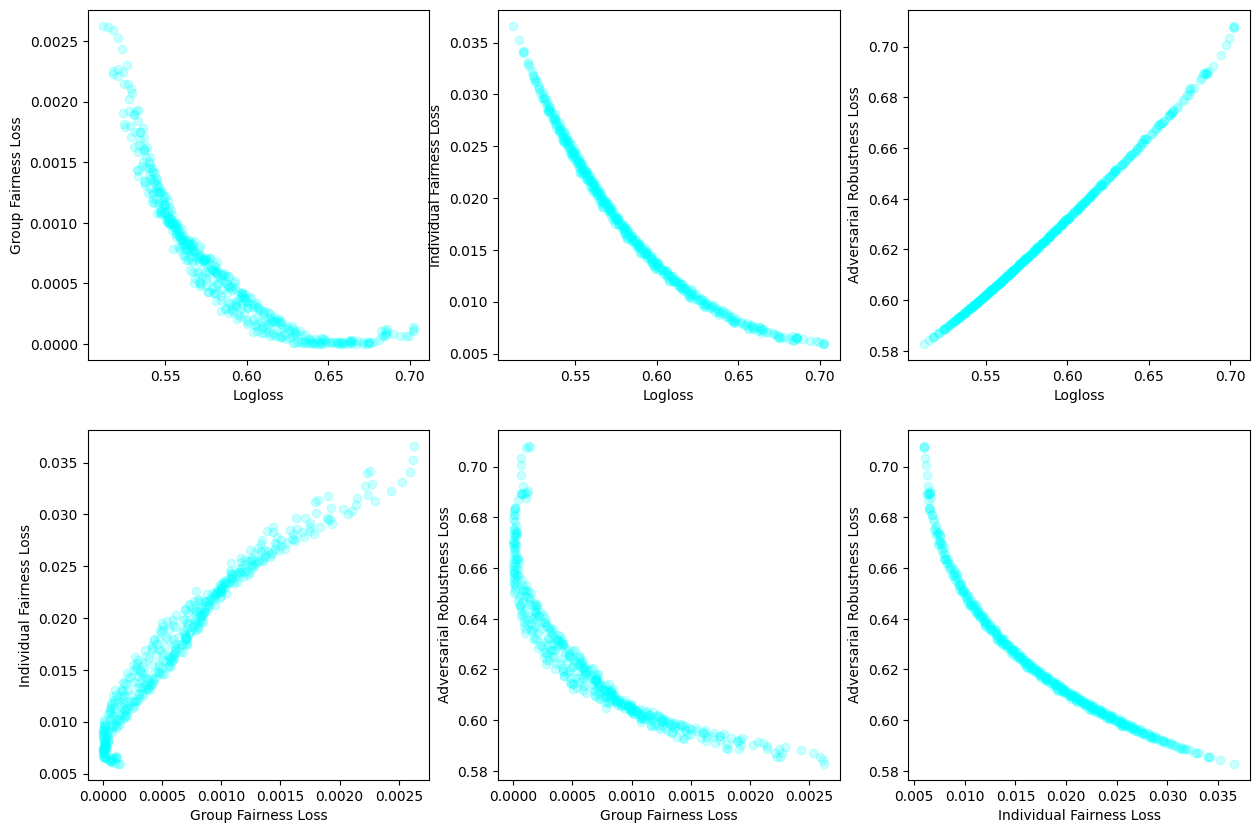

In [43]:
visualize_results_projections("exp49", dim=4, labels = ['Logloss', "Group Fairness Loss", "Individual Fairness Loss", "Adversarial Robustness Loss"])

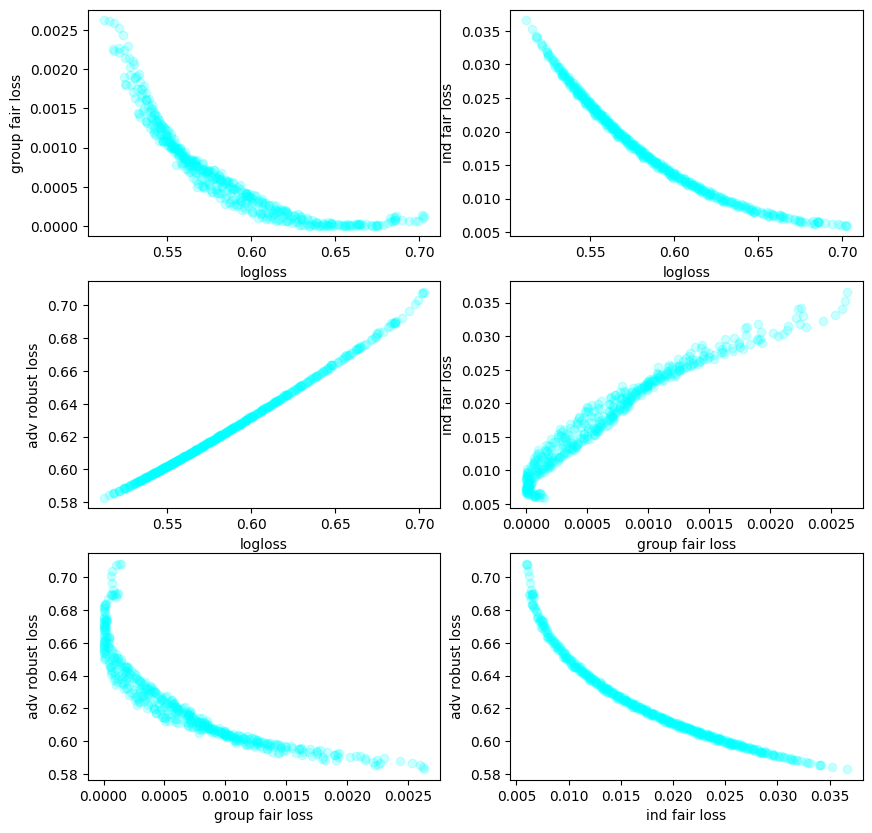

In [118]:
visualize_results_projections("exp49", dim=4, labels = ['logloss', "group fair loss", "ind fair loss", "adv robust loss"])

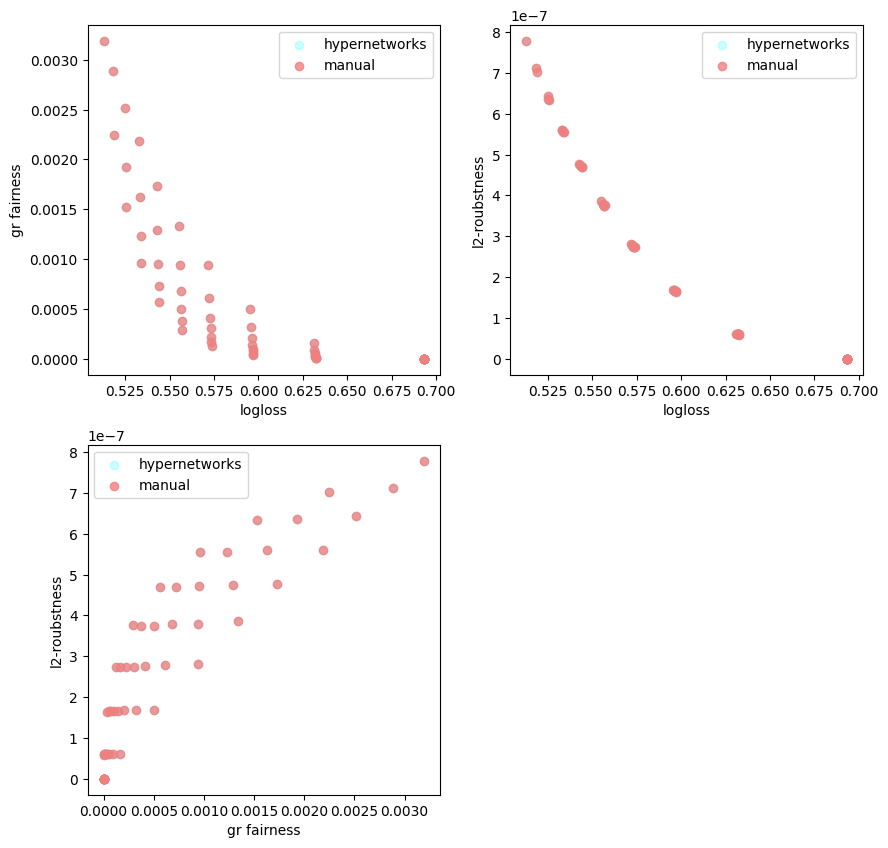

In [21]:
# checking whether I broke anything with refactoring 

compare_3d_results_projections("exp46base", "exp46base", labels = ["logloss", "gr fairness", "l2-roubstness"])

$L(\theta) = \text{training loss}$  
$L(\theta) \rightarrow \text{min}$  
$\text{+ robustness}$  
$\text{+ fairness}$  
$\text{+ etc.}$
  

${\large l_6(\theta)}$

\begin{equation}
    \begin{cases}
      l_1(\theta) \rightarrow \text{min}_\theta\\
      l_2(\theta) \rightarrow \text{min}_\theta\\
      ...\\
      l_n(\theta) \rightarrow \text{min}_\theta\\
    \end{cases}\,
\end{equation}

$$\textbf{In most cases an optimal solution does not exist}$$
$$\textbf{So you find pareto-optimal solution}$$


For multiple objectives $f_1(x), ..., f_n(x)$ we say that $x$ strongly dominates $y$ if $\forall i f_i(x) \le f_i(y)$ and $\exists i: f_i(x) < f_i(y)$. 

Solution $x$ is called pareto-optimal if there is no $y$ that strongly dominates $x$. Pareto-optimal solutions form pareto-front. 

$$\sum_{i=1}^n \text{r}_i\cdot l_i(\theta) \rightarrow \text{min}_\theta$$
$$\text{s.t.} \sum_i \text{r}_i = 1 \ \text{and}\ \  \forall i: \ \text{r}_i \ge 0$$

| number of objectives  |  $2$ | $3$  | $4$  | ...  | $n$ |
|---|---|---|---|---|---|
| grid size  | $10$  | $100$ | $1000$  | ...  | $10^n$ |

| Human  |  John |
|---|---|
| age  | 34  |
| education| BS|
| mar| Married|
| **SEX** | Male|
| race| Asian|

| Salary |
| --- |
| >50K|
| < 50K|

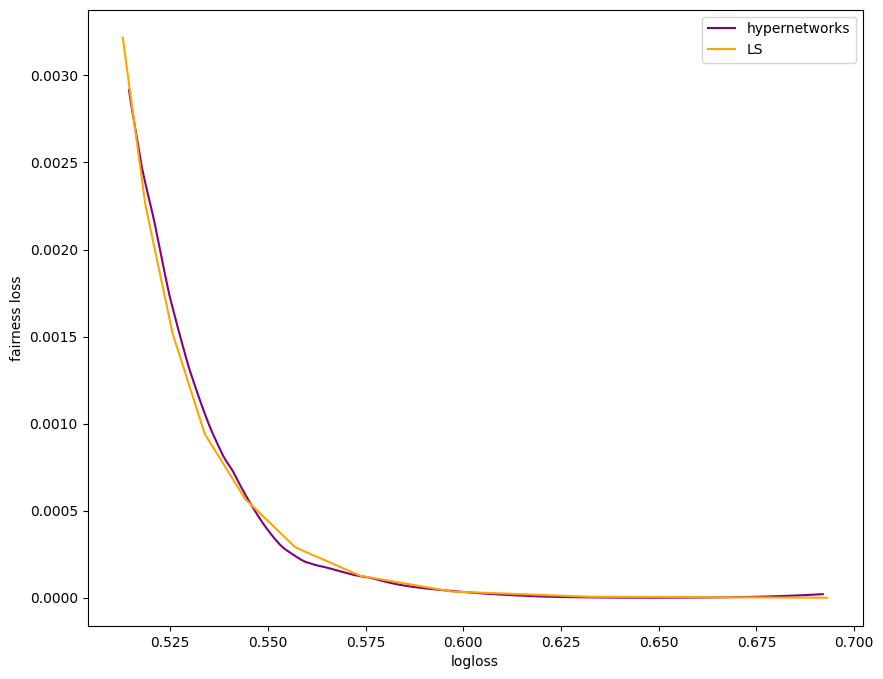

In [11]:
compare_experiments_2d("exp40", "exp41")

# Plots for report

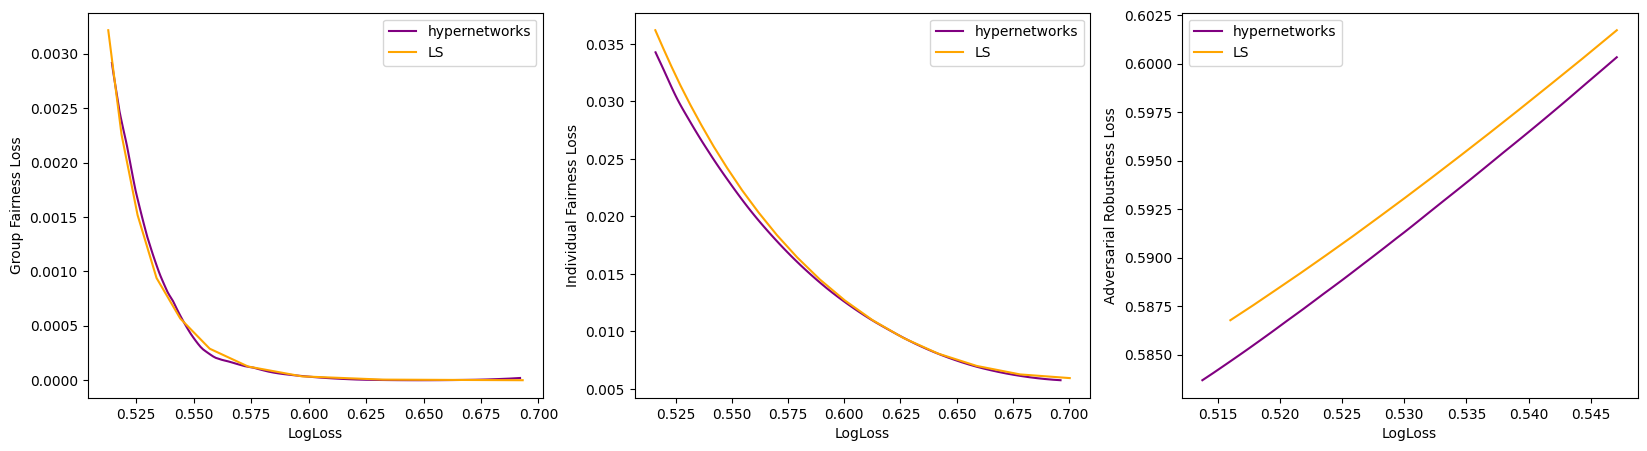

In [38]:
labels=["logloss", "group fairness loss"]
inv=False
ignore_first=False
results = []
for exp_name in ("exp40", "exp41", "exp43", "exp43base", "exp44", "exp44base"):
    info = get_exp_results(exp_name)
    result = info["result"]
    results.append(result)
fig = plt.figure(figsize = (20, 5))
#plt.title("Trade-offs in 2D")
# Group fairness vs Logloss
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(results[0][0], results[0][1], label = "hypernetworks", color = 'purple')
ax1.plot(results[1][0], results[1][1], label = "LS", color = 'orange')
ax1.set_xlabel("LogLoss")
ax1.set_ylabel("Group Fairness Loss")
plt.legend()

# Individual Fairness vs Logloss

ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(results[2][0], results[2][1], label = "hypernetworks", color = 'purple')
ax1.plot(results[3][0], results[3][1], label = "LS", color = 'orange')
ax1.set_xlabel("LogLoss")
ax1.set_ylabel("Individual Fairness Loss")
plt.legend()

# Adv robustness vs Logloss


ax1 = fig.add_subplot(1, 3, 3)
ax1.plot(results[4][0], results[4][1], label = "hypernetworks", color = 'purple')
ax1.plot(results[5][0], results[5][1], label = "LS", color = 'orange')
ax1.set_xlabel("LogLoss")
ax1.set_ylabel("Adversarial Robustness Loss")
plt.legend()

plt.show()

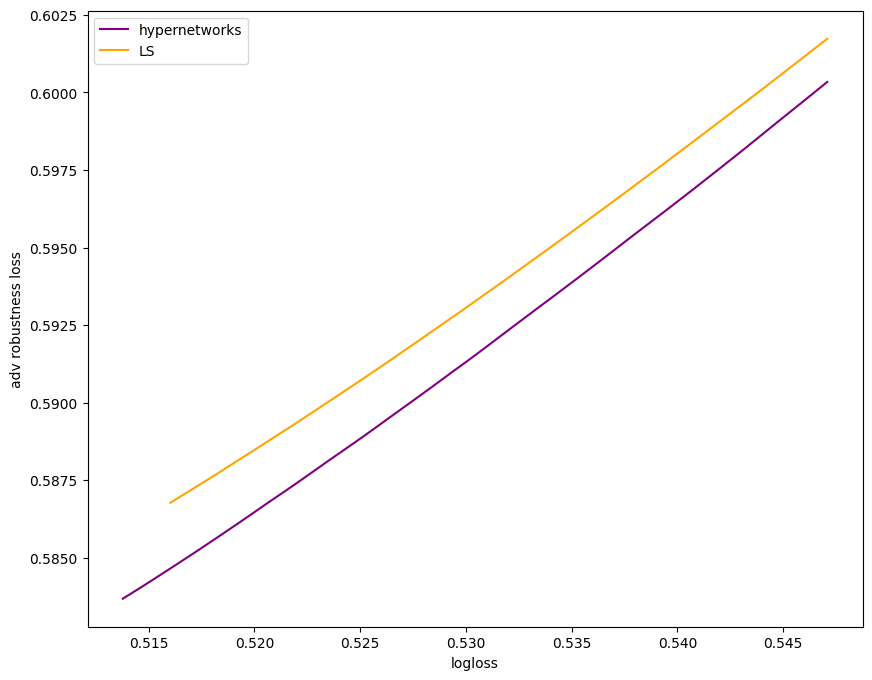

In [22]:
compare_experiments_2d("exp44", "exp44base", labels=["logloss", "adv robustness loss"])